0j MA5 percentage difference (EM creator default run card vs non-biased run card) :  [ 4.11960133  0.28641873  0.15473603  5.47787289 11.21917062  6.80085092
  9.88277525  6.85820204  6.12862216  9.19298634 10.42717793  7.67488158
  3.22494432 10.37906137  7.844198    9.37866354  4.72916317 22.64894141
  5.35019455  9.45307225 12.44509517 13.23828921]
------------------------------------------
1j MA5 percentage difference (EM creator default run card vs non-biased run card) :  [ 6.49931224  4.85651214  0.42883549  3.34843056  0.96812792  2.71987799
  3.58718698  7.28433627  0.36081393  5.00652779  1.39758031 21.01881597
  1.63487738  6.84280555  5.70510245  4.41605333 10.77175698  4.63980464
 10.77682982 25.07687052 22.62378027  0.89016511]
------------------------------------------
2j MA5 percentage difference (EM creator default run card vs non-biased run card) :  [8.71054504e+00 4.21885692e+00 2.36974759e+00 9.22207014e+00
 1.55780933e+01 6.37542829e+00 3.90149576e+00 8.59397013e-01

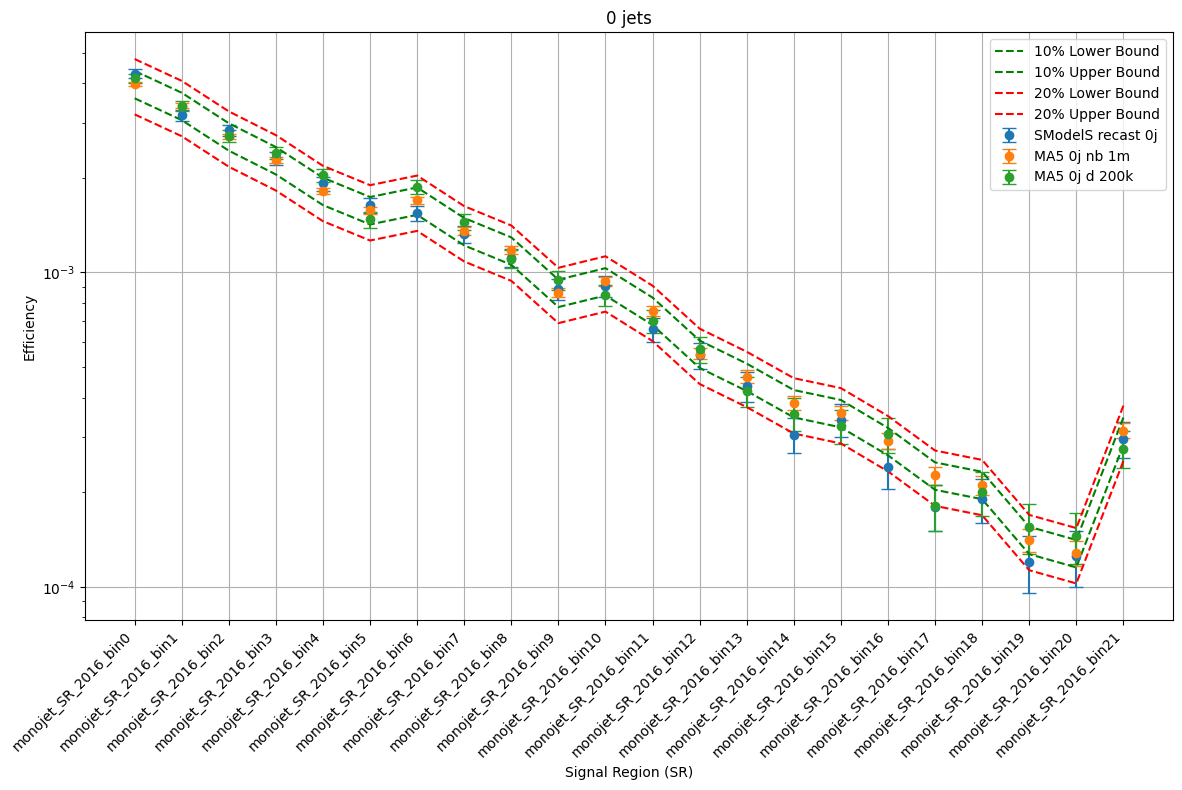

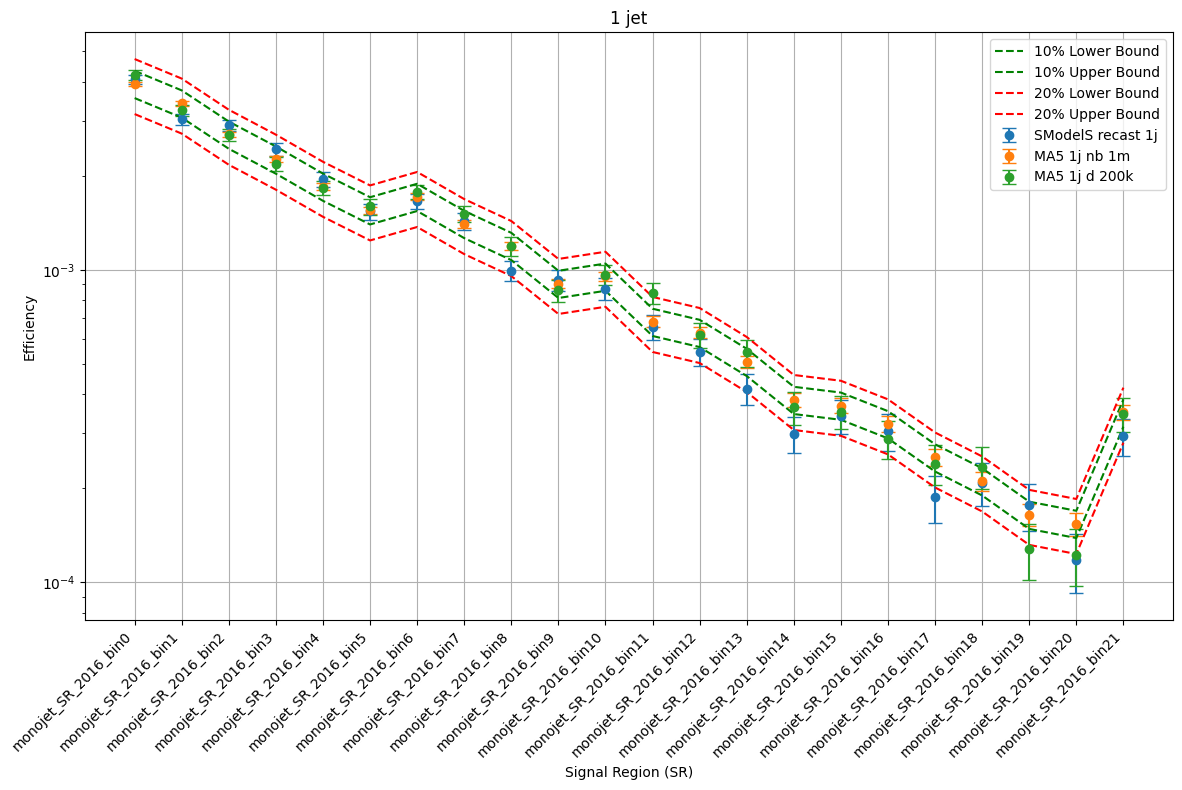

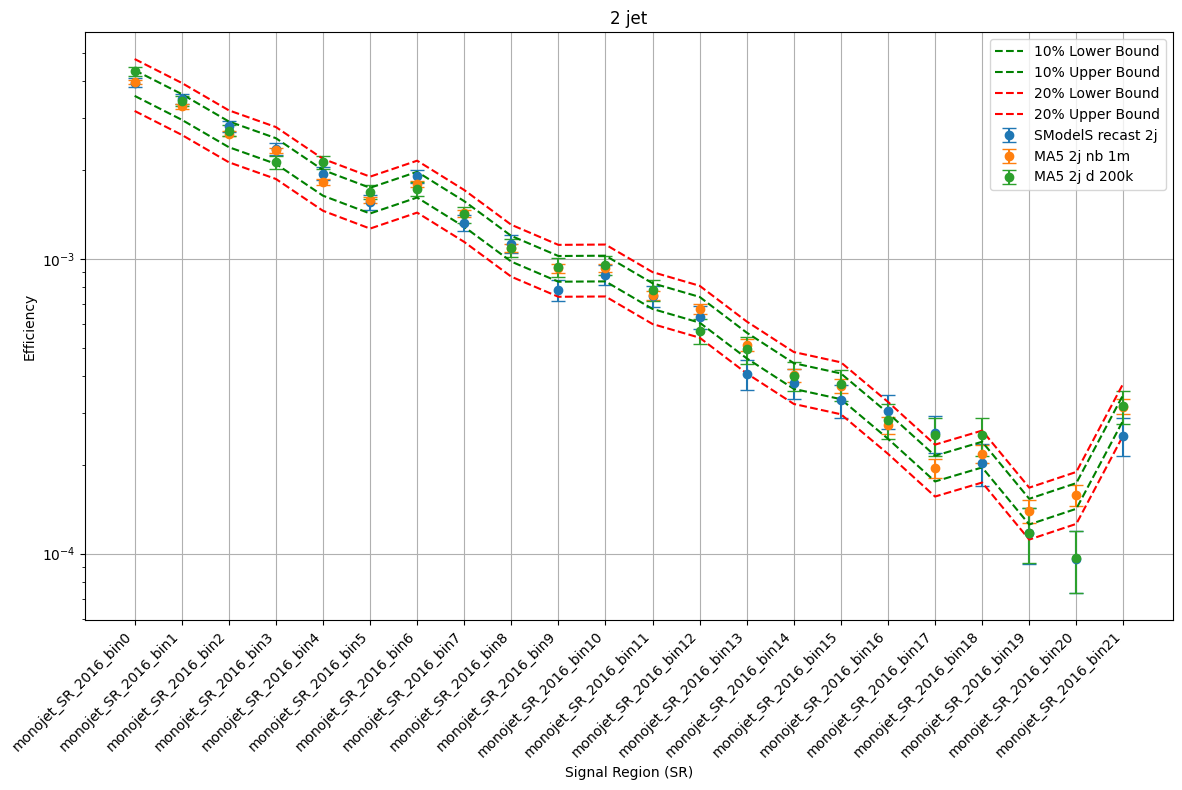

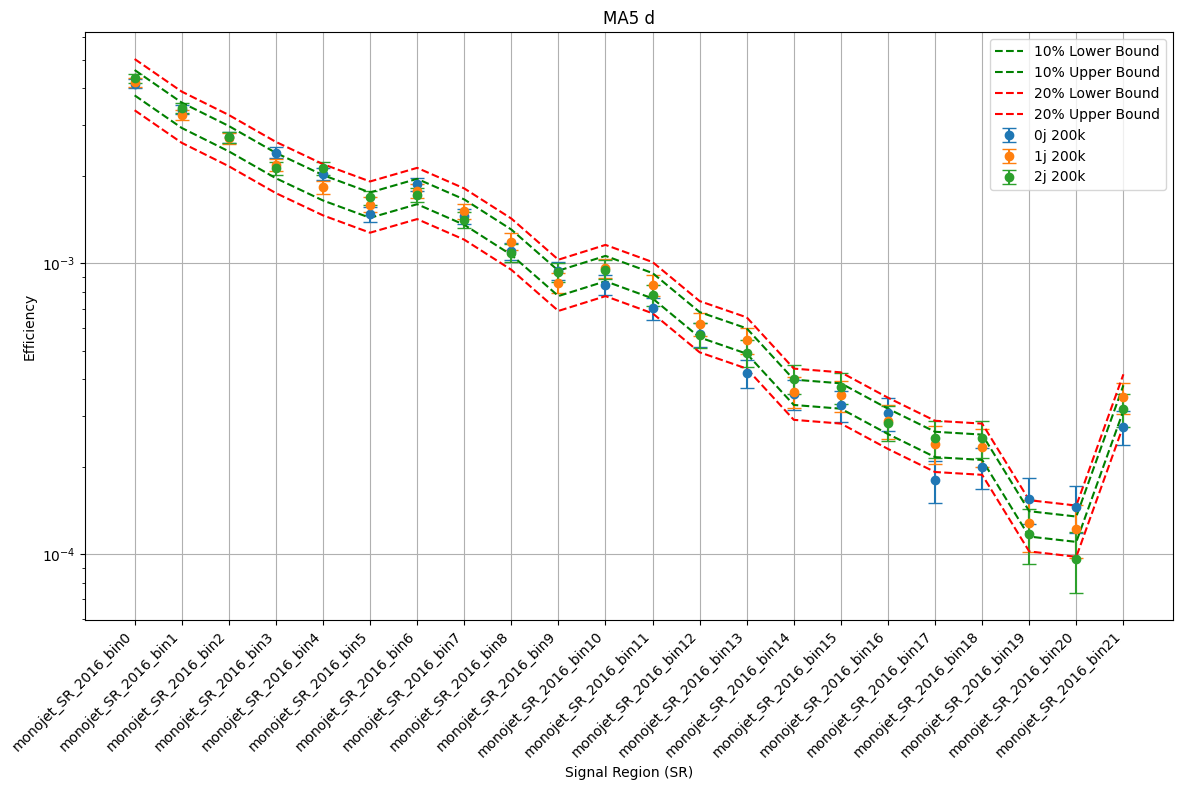

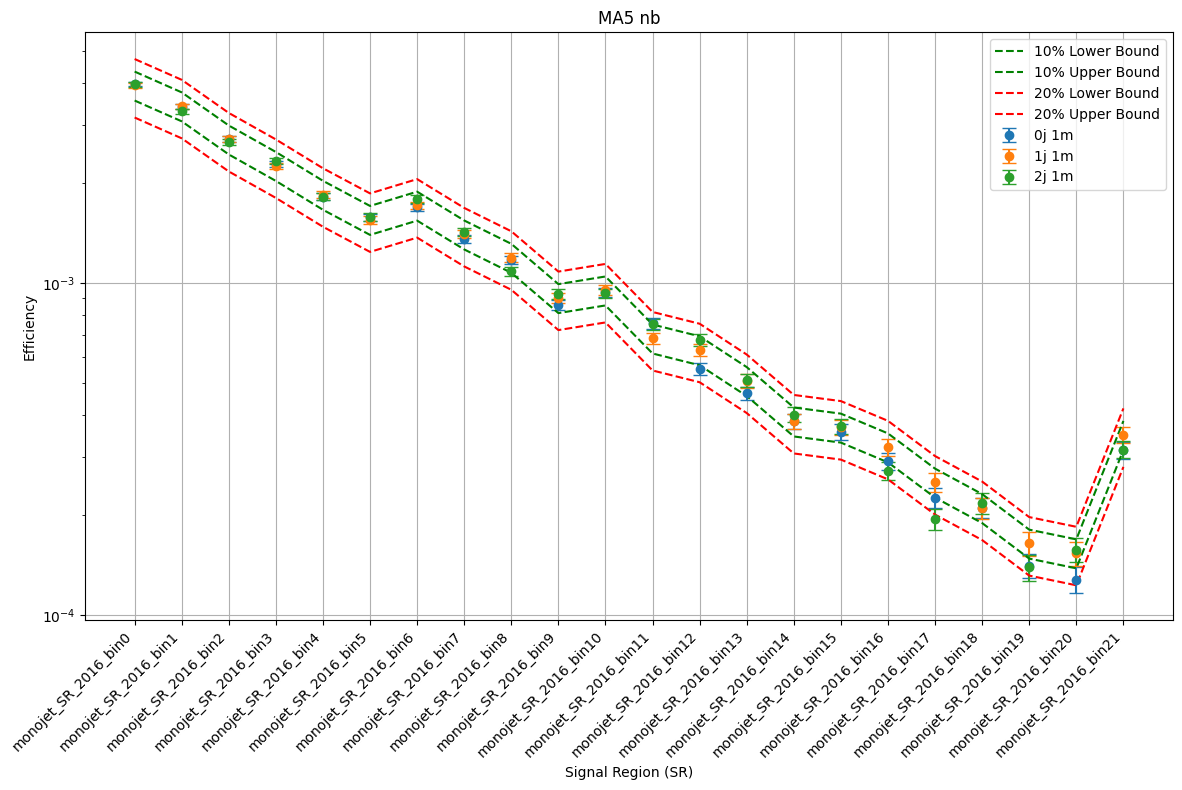

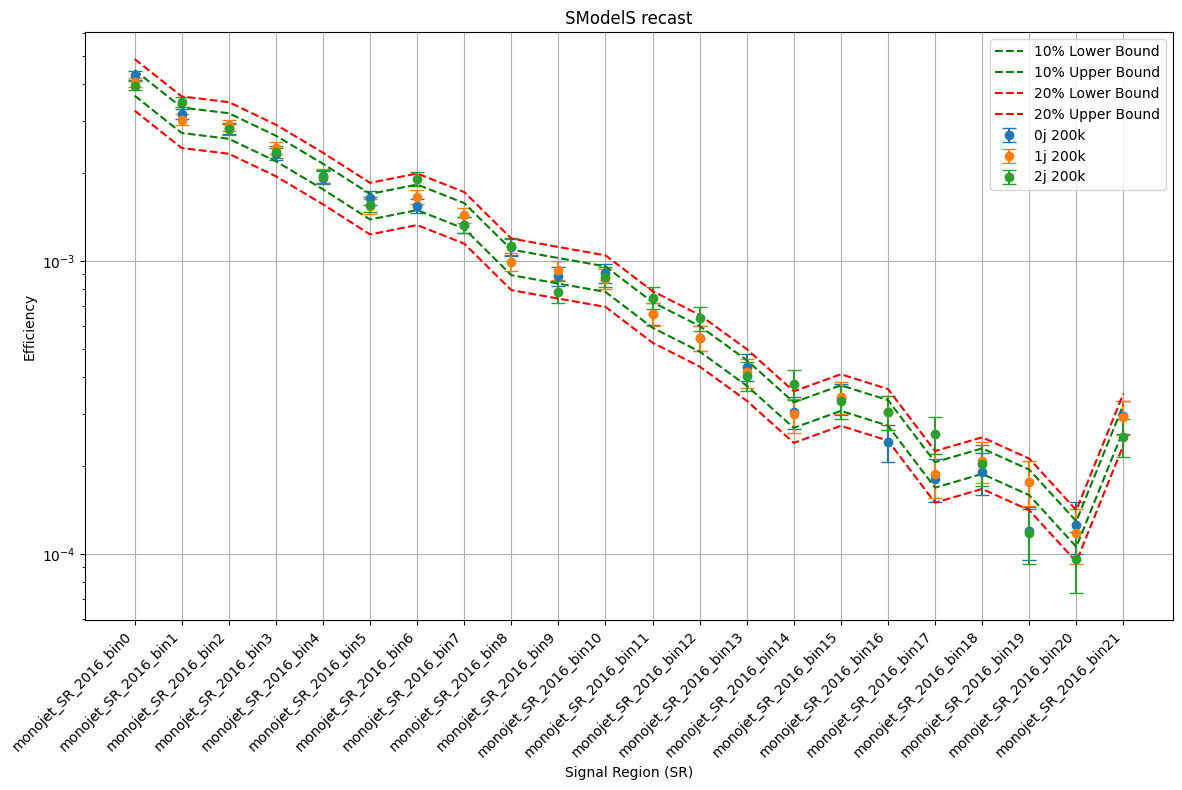

In [14]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Load the .pcl file
pcl_0j = "SModelS-recast-chain/200k/TChiISR_test_0j_2001_2000_200K/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_0j = pd.read_pickle(pcl_0j).T
pcl_1j = "SModelS-recast-chain/200k/TChiISR_test_1j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_1j = pd.read_pickle(pcl_1j).T
pcl_2j = "SModelS-recast-chain/200k/TChiISR_test_2j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_2j = pd.read_pickle(pcl_2j).T

filtered_lines_0j = df_0j[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error")]
SR_0j = filtered_lines_0j.index.tolist()
filtered_lines_1j = df_1j[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error")]
SR_1j = filtered_lines_1j.index.tolist()
filtered_lines_2j = df_2j[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error")]
SR_2j = filtered_lines_2j.index.tolist()

########################################################

# 0 jets

nevents_2016_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error"), 0].tolist())
nevents_2017_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error"), 1].tolist())
nevents_2018_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error"), 2].tolist())

lumi_2016_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("Luminosity"), 0].tolist())
lumi_2017_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("Luminosity"), 1].tolist())
lumi_2018_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("Luminosity"), 2].tolist())

tot_cx_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("xsec") & ~df_0j.index.str.contains("pT150"), 0].tolist())*1000

nevents_err_p_2016_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorP"), 0].tolist())
nevents_err_p_2017_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorP"), 1].tolist())
nevents_err_p_2018_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorP"), 2].tolist())

nevents_err_m_2016_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorM"), 0].tolist())
nevents_err_m_2017_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorM"), 1].tolist())
nevents_err_m_2018_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorM"), 2].tolist())


tot_lumi_0j = lumi_2016_fb_0j + lumi_2017_fb_0j + lumi_2018_fb_0j

eff_2016_0j = nevents_2016_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_2017_0j = nevents_2017_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_2018_0j = nevents_2018_0j / (tot_lumi_0j * tot_cx_fb_0j)

eff_err_p_2016_0j = nevents_err_p_2016_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_err_p_2017_0j = nevents_err_p_2017_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_err_p_2018_0j = nevents_err_p_2018_0j / (tot_lumi_0j * tot_cx_fb_0j)

########################################################

# 1 jets

nevents_2016_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error"), 0].tolist())
nevents_2017_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error"), 1].tolist())
nevents_2018_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error"), 2].tolist())

lumi_2016_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("Luminosity"), 0].tolist())
lumi_2017_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("Luminosity"), 1].tolist())
lumi_2018_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("Luminosity"), 2].tolist())

tot_cx_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("xsec") & ~df_1j.index.str.contains("pT150"), 0].tolist())*1000

nevents_err_p_2016_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorP"), 0].tolist())
nevents_err_p_2017_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorP"), 1].tolist())
nevents_err_p_2018_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorP"), 2].tolist())

nevents_err_m_2016_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorM"), 0].tolist())
nevents_err_m_2017_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorM"), 1].tolist())
nevents_err_m_2018_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorM"), 2].tolist())


tot_lumi_1j = lumi_2016_fb_1j + lumi_2017_fb_1j + lumi_2018_fb_1j

eff_2016_1j = nevents_2016_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_2017_1j = nevents_2017_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_2018_1j = nevents_2018_1j / (tot_lumi_1j * tot_cx_fb_1j)

eff_err_p_2016_1j = nevents_err_p_2016_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_err_p_2017_1j = nevents_err_p_2017_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_err_p_2018_1j = nevents_err_p_2018_1j / (tot_lumi_1j * tot_cx_fb_1j)

########################################################

# 2 jets

nevents_2016_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error"), 0].tolist())
nevents_2017_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error"), 1].tolist())
nevents_2018_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error"), 2].tolist())

lumi_2016_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("Luminosity"), 0].tolist())
lumi_2017_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("Luminosity"), 1].tolist())
lumi_2018_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("Luminosity"), 2].tolist())

tot_cx_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("xsec") & ~df_2j.index.str.contains("pT150"), 0].tolist())*1000

nevents_err_p_2016_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorP"), 0].tolist())
nevents_err_p_2017_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorP"), 1].tolist())
nevents_err_p_2018_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorP"), 2].tolist())

nevents_err_m_2016_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorM"), 0].tolist())
nevents_err_m_2017_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorM"), 1].tolist())
nevents_err_m_2018_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorM"), 2].tolist())


tot_lumi_2j = lumi_2016_fb_2j + lumi_2017_fb_2j + lumi_2018_fb_2j

eff_2016_2j = nevents_2016_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_2017_2j = nevents_2017_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_2018_2j = nevents_2018_2j / (tot_lumi_2j * tot_cx_fb_2j)

eff_err_p_2016_2j = nevents_err_p_2016_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_err_p_2017_2j = nevents_err_p_2017_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_err_p_2018_2j = nevents_err_p_2018_2j / (tot_lumi_2j * tot_cx_fb_2j)

########################################################
def extract_cut_info(filename):
    cut_dict = {}
    initial_entries = None
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract initial number of entries
    for i, line in enumerate(lines):
        if "<InitialCounter>" in line:
            initial_entries = int(lines[i+2].split()[0])  # nentries is on the third line after <InitialCounter>

    return initial_entries


MA5_0j_d_entries = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf'
MA5_1j_d_entries = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf'
MA5_2j_d_entries = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf'

MA5_0j_nb_entries = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf'
MA5_1j_nb_entries = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf'
MA5_2j_nb_entries = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf'

tot_entries_0j_d = extract_cut_info(MA5_0j_d_entries)
tot_entries_1j_d = extract_cut_info(MA5_1j_d_entries)
tot_entries_2j_d = extract_cut_info(MA5_2j_d_entries)

tot_entries_0j_nb = extract_cut_info(MA5_0j_nb_entries)
tot_entries_1j_nb = extract_cut_info(MA5_1j_nb_entries)
tot_entries_2j_nb = extract_cut_info(MA5_2j_nb_entries)


# Function to load and process the data file
def extract_efficiencies(file_path, start_index=0, end_index=None):
    """
    Extracts signal region names, efficiencies, and their statistical errors from the file.

    Parameters:
    - file_path: Path to the data file.
    - start_index: Starting index for signal regions (inclusive). Default is 0.
    - end_index: Ending index for signal regions (exclusive).
    If None, include all regions starting from start_index.

    Returns:
    - regions: NumPy array of signal region names.
    - efficiencies: NumPy array of efficiencies as floats.
    - errors: NumPy array of statistical errors as floats.
    """
    # Open the file and preprocess the lines
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Remove header and clean up lines
    data_lines = [line.strip() for line in lines if not line.startswith('#') and line.strip()]
    
    # Split and parse the lines
    parsed_data = []
    for line in data_lines:
        # Split the line into parts
        parts = line.split('||')
        if len(parts) != 2:
            continue  # Skip malformed lines
        left, right = parts
        columns = left.split() + right.split()
        parsed_data.append(columns)
    
    # Convert parsed data into a DataFrame
    df = pd.DataFrame(parsed_data, columns=['dataset', 'analysis', 'region', 'sig95_exp', 
                                            'sig95_obs', 'efficiency', 'error'])
    
    # Apply the slicing based on start_index and end_index
    if end_index is not None:
        df = df.iloc[start_index:end_index]
    else:
        df = df.iloc[start_index:]
    
    # Extract columns
    regions = df['region'].tolist()
    efficiencies = df['efficiency'].astype(float).tolist()
    errors = df['error'].astype(float).tolist()
    
    return np.array(regions), np.array(efficiencies), np.array(errors)

start_index = 0
end_index = 22

# from MA5 (default EM creator run card and non biased run card)

MA5_0j_d = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_1j_d = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_2j_d = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'

MA5_0j_nb = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_1j_nb = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_2j_nb = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'


regions_0j_d, eff_0j_d, err_0j_d = extract_efficiencies(MA5_0j_d,
                                                        start_index=start_index, end_index=end_index)
regions_1j_d, eff_1j_d, err_1j_d = extract_efficiencies(MA5_1j_d,
                                                        start_index=start_index, end_index=end_index)
regions_2j_d, eff_2j_d, err_2j_d = extract_efficiencies(MA5_2j_d,
                                                        start_index=start_index, end_index=end_index)

regions_0j_nb, eff_0j_nb, err_0j_nb = extract_efficiencies(MA5_0j_nb,
                                                        start_index=start_index, end_index=end_index)
regions_1j_nb, eff_1j_nb, err_1j_nb = extract_efficiencies(MA5_1j_nb,
                                                        start_index=start_index, end_index=end_index)
regions_2j_nb, eff_2j_nb, err_2j_nb = extract_efficiencies(MA5_2j_nb,
                                                        start_index=start_index, end_index=end_index)

delta_eff_0j_d = np.sqrt( (eff_0j_d * (1 - eff_0j_d)) / tot_entries_0j_d )
delta_eff_1j_d = np.sqrt( (eff_1j_d * (1 - eff_1j_d)) / tot_entries_1j_d )
delta_eff_2j_d = np.sqrt( (eff_2j_d * (1 - eff_2j_d)) / tot_entries_2j_d )


delta_eff_0j_nb = np.sqrt( (eff_0j_nb * (1 - eff_0j_nb)) / tot_entries_0j_nb )
delta_eff_1j_nb = np.sqrt( (eff_1j_nb * (1 - eff_1j_nb)) / tot_entries_1j_nb )
delta_eff_2j_nb = np.sqrt( (eff_2j_nb * (1 - eff_2j_nb)) / tot_entries_2j_nb )

###############################################################
# Compute percentage difference
percentage_diff_0j = np.abs(eff_0j_nb - eff_2016_0j) / ((eff_0j_nb + eff_2016_0j) / 2) * 100
percentage_diff_1j = np.abs(eff_1j_nb - eff_2016_1j) / ((eff_1j_nb + eff_2016_1j) / 2) * 100
percentage_diff_2j = np.abs(eff_2j_nb - eff_2016_2j) / ((eff_2j_nb + eff_2016_2j) / 2) * 100

ma5_percentage_diff_0j = np.abs(eff_0j_nb - eff_0j_d) / ((eff_0j_nb + eff_0j_d) / 2) * 100
ma5_percentage_diff_1j = np.abs(eff_1j_nb - eff_1j_d) / ((eff_1j_nb + eff_1j_d) / 2) * 100
ma5_percentage_diff_2j = np.abs(eff_2j_nb - eff_2j_d) / ((eff_2j_nb + eff_2j_d) / 2) * 100

print("0j MA5 percentage difference (EM creator default run card vs non-biased run card) : ",
      ma5_percentage_diff_0j)
print("------------------------------------------")
print("1j MA5 percentage difference (EM creator default run card vs non-biased run card) : ",
      ma5_percentage_diff_1j)
print("------------------------------------------")
print("2j MA5 percentage difference (EM creator default run card vs non-biased run card) : ",
      ma5_percentage_diff_2j)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")

print("0j percentage difference (MA5 vs SModelS recast) : ", percentage_diff_0j)
print("------------------------------------------")
print("1j percentage difference (MA5 vs SModelS recast) : ", percentage_diff_1j)
print("------------------------------------------")
print("2j percentage difference (MA5 vs SModelS recast) : ", percentage_diff_2j)

# Calculate 10% error values

ten_percent_error_1j_d = [0.1 * eff for eff in eff_1j_d]
twenty_percent_error_1j_d = [0.2 * eff for eff in eff_1j_d]


ten_percent_error_0j = [0.1 * eff for eff in eff_0j_nb]
twenty_percent_error_0j = [0.2 * eff for eff in eff_0j_nb]

ten_percent_error_1j = [0.1 * eff for eff in eff_1j_nb]
twenty_percent_error_1j = [0.2 * eff for eff in eff_1j_nb]

ten_percent_error_2j = [0.1 * eff for eff in eff_2j_nb]
twenty_percent_error_2j = [0.2 * eff for eff in eff_2j_nb]


ten_percent_error_1j_SM = [0.1 * eff for eff in eff_2016_1j]
twenty_percent_error_1j_SM = [0.2 * eff for eff in eff_2016_1j]

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
###plt.errorbar(regions_0j_nb, eff_0j_nb, yerr=err_0j_nb, fmt='o', capsize=5,
###             label=f'MA5 0j nb')
###plt.errorbar(regions_0j_d, eff_0j_d, yerr=err_0j_d, fmt='o', capsize=5,
###             label=f'MA5 0j d')
plt.errorbar(regions_0j_d, eff_2016_0j, yerr=eff_err_p_2016_0j, fmt='o', capsize=5,
             label=f'SModelS recast 0j')

plt.errorbar(regions_0j_nb, eff_0j_nb, yerr=delta_eff_0j_nb, fmt='o', capsize=5,
             label=f'MA5 0j nb 1m')
plt.errorbar(regions_0j_d, eff_0j_d, yerr=delta_eff_0j_d, fmt='o', capsize=5,
             label=f'MA5 0j d 200k')


# Plot the 10% error as line intervals
plt.plot(regions_0j_nb, [eff - err for eff, err in zip(eff_0j_nb, ten_percent_error_0j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_0j_nb, [eff + err for eff, err in zip(eff_0j_nb, ten_percent_error_0j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_0j_nb, [eff - err for eff, err in zip(eff_0j_nb, twenty_percent_error_0j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_0j_nb, [eff + err for eff, err in zip(eff_0j_nb, twenty_percent_error_0j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('0 jets')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
###plt.errorbar(regions_1j_nb, eff_1j_nb, yerr=err_1j_nb, fmt='o', capsize=5,
###             label=f'MA5 1j nb')
###plt.errorbar(regions_1j_d, eff_1j_d, yerr=err_1j_d, fmt='o', capsize=5,
###             label=f'MA5 1j d')
plt.errorbar(regions_1j_d, eff_2016_1j, yerr=eff_err_p_2016_1j, fmt='o', capsize=5,
             label=f'SModelS recast 1j')

plt.errorbar(regions_1j_nb, eff_1j_nb, yerr=delta_eff_1j_nb, fmt='o', capsize=5,
             label=f'MA5 1j nb 1m')
plt.errorbar(regions_1j_d, eff_1j_d, yerr=delta_eff_1j_d, fmt='o', capsize=5,
             label=f'MA5 1j d 200k')


# Plot the 10% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('1 jet')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
###plt.errorbar(regions_2j_nb, eff_2j_nb, yerr=err_2j_nb, fmt='o', capsize=5,
###             label=f'MA5 2j nb')
###plt.errorbar(regions_2j_d, eff_2j_d, yerr=err_2j_d, fmt='o', capsize=5,
###             label=f'MA5 2j d')
plt.errorbar(regions_2j_d, eff_2016_2j, yerr=eff_err_p_2016_2j, fmt='o', capsize=5,
             label=f'SModelS recast 2j')

plt.errorbar(regions_2j_nb, eff_2j_nb, yerr=delta_eff_2j_nb, fmt='o', capsize=5,
             label=f'MA5 2j nb 1m')
plt.errorbar(regions_2j_d, eff_2j_d, yerr=delta_eff_2j_d, fmt='o', capsize=5,
             label=f'MA5 2j d 200k')

# Plot the 10% error as line intervals
plt.plot(regions_2j_nb, [eff - err for eff, err in zip(eff_2j_nb, ten_percent_error_2j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_2j_nb, [eff + err for eff, err in zip(eff_2j_nb, ten_percent_error_2j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_2j_nb, [eff - err for eff, err in zip(eff_2j_nb, twenty_percent_error_2j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_2j_nb, [eff + err for eff, err in zip(eff_2j_nb, twenty_percent_error_2j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('2 jet')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
#plt.errorbar(regions_0j_d, eff_0j_d, yerr=err_0j_d, fmt='o', capsize=5,
#             label=f'0j 200k')
#plt.errorbar(regions_1j_d, eff_1j_d, yerr=err_1j_d, fmt='o', capsize=5,
#             label=f'1j 200k')
#plt.errorbar(regions_2j_d, eff_2j_d, yerr=err_2j_d, fmt='o', capsize=5,
#             label=f'2j 200k')

plt.errorbar(regions_0j_d, eff_0j_d, yerr=delta_eff_0j_d, fmt='o', capsize=5,
             label=f'0j 200k')
plt.errorbar(regions_1j_d, eff_1j_d, yerr=delta_eff_1j_d, fmt='o', capsize=5,
             label=f'1j 200k')
plt.errorbar(regions_2j_d, eff_2j_d, yerr=delta_eff_2j_d, fmt='o', capsize=5,
             label=f'2j 200k')



# Plot the 10% error as line intervals
plt.plot(regions_1j_d, [eff - err for eff, err in zip(eff_1j_d, ten_percent_error_1j_d)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_d, [eff + err for eff, err in zip(eff_1j_d, ten_percent_error_1j_d)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_d, [eff - err for eff, err in zip(eff_1j_d, twenty_percent_error_1j_d)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_d, [eff + err for eff, err in zip(eff_1j_d, twenty_percent_error_1j_d)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('MA5 d')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_0j_nb, eff_0j_nb, yerr=delta_eff_0j_nb, fmt='o', capsize=5,
             label=f'0j 1m')
plt.errorbar(regions_1j_nb, eff_1j_nb, yerr=delta_eff_1j_nb, fmt='o', capsize=5,
             label=f'1j 1m')
plt.errorbar(regions_2j_nb, eff_2j_nb, yerr=delta_eff_2j_nb, fmt='o', capsize=5,
             label=f'2j 1m')



# Plot the 10% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('MA5 nb')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_0j_nb, eff_2016_0j, yerr=eff_err_p_2016_0j, fmt='o', capsize=5,
             label=f'0j 200k')
plt.errorbar(regions_1j_nb, eff_2016_1j, yerr=eff_err_p_2016_1j, fmt='o', capsize=5,
             label=f'1j 200k')
plt.errorbar(regions_2j_nb, eff_2016_2j, yerr=eff_err_p_2016_2j, fmt='o', capsize=5,
             label=f'2j 200k')

# Plot the 10% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_2016_1j, ten_percent_error_1j_SM)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_2016_1j, ten_percent_error_1j_SM)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_2016_1j, twenty_percent_error_1j_SM)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_2016_1j, twenty_percent_error_1j_SM)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('SModelS recast')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

Check the stat. error on the efficiency given by MA5
According to J. Araz in: 
https://answers.launchpad.net/madanalysis5/%2Bquestion/693987?utm_source=chatgpt.com
it's calculated as sqrt(eff*(1-eff)/N_0), with N_0 being the initial number of events and eff being the efficiency written in the CLs file.

I will check it in:
mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_0jet.2001_2000/ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset, 
for monojet_SR_2016_bin0 where the eff is 0.0039798, the stat error is 0.5022148 and the initial number of events is 999555 (taken from: monojet_SR_2016.saf)

In [6]:
import numpy as np

eff = 0.0039798
N_0 = 999555
stat = np.sqrt(eff*(1-eff)/N_0)
print(stat)

6.297401003591325e-05


Something is going wrong when calculating the statistical error!

I will do 2 checks:

1 - I will calculate the stat error for another topology in MA5 

2 - I will run for the same hepmc file using the same delphes card with my local MA5

# I am checking now the TRV1 topology for m_{Z'} = 2500 GeV m_{DM} = 300 GeV, in the following directory:

/Users/altakach/Jupyter-projects/SModelS-data/CMS-EXO-20-004/2500_300_MA5/Camila_delphes_card/ANA_TRV1_1jet.2500_300/Output/SAF/defaultset

here, for monojet_SR_2016_bin0, eff = 0.0034717 and the stat error = 0.0000160.
The intial number of entries is: 854908


In [7]:
import numpy as np

eff = 0.0034717
N_0 = 854908
stat = np.sqrt(eff*(1-eff)/N_0)
print(stat)

6.361451529267363e-05


For this case it is still not equal to what one would get from the formula provided by Jack, but at least it is of the same order.

I also did the second check, with MA5 installed on my pc, and I am also getting off stat error.
see:
~/Tools/madanalysis5/5k_default_run_card_keep_hepmc/Output/SAF/defaultset/CLs_output.dat


In order to estimate the stat error I calculated it for thr MA5 case as: sqrt( (eff*(1-eff)) / N_0)

0j MA5 percentage difference (EM creator default run card vs non-biased run card) :  [ 3.10065561  1.71020719  2.97139142  4.86403367  0.4854831   6.79292713
 10.95875621  4.99756809  4.6334602   9.06360193  2.58616723 19.95044986
  6.07752957  8.99951196  3.72485721  5.77124869 14.3557423   5.56506849
  9.51927653 42.56465517 16.44528779  1.65198238]
------------------------------------------
1j MA5 percentage difference (EM creator default run card vs non-biased run card) :  [ 0.63653724  0.31428923  6.92104729  5.0006962   3.7301383   3.33380183
  1.19778792  1.0854297   4.34765998  8.64136359  8.46736536  2.57033692
 17.53731343  7.85883209 35.56289568 19.62371993  4.70930233  2.6797509
 10.89494163 19.59183673 14.17910448  2.37095579]
------------------------------------------
2j MA5 percentage difference (EM creator default run card vs non-biased run card) :  [ 0.24256858  0.37044548  3.19815874  1.2122667   3.97031715  7.53965004
  3.15177479  0.47735656  3.88544892  2.21567803 

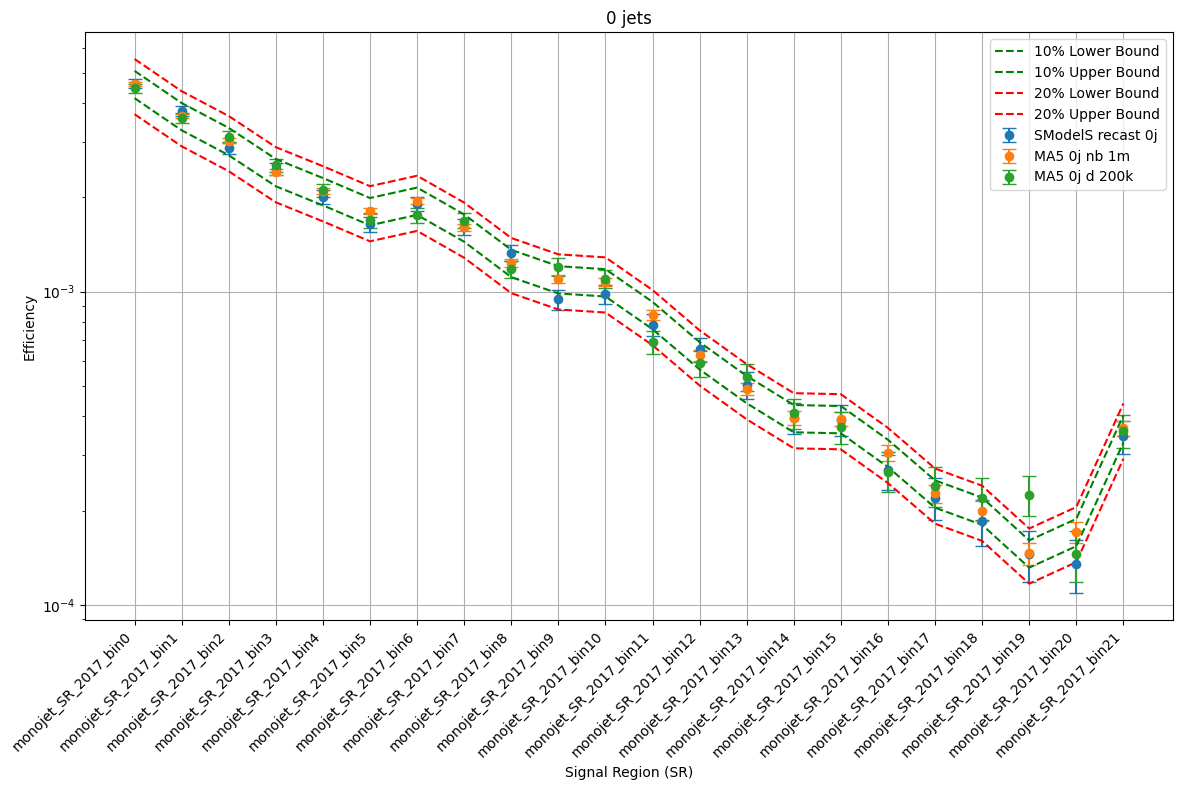

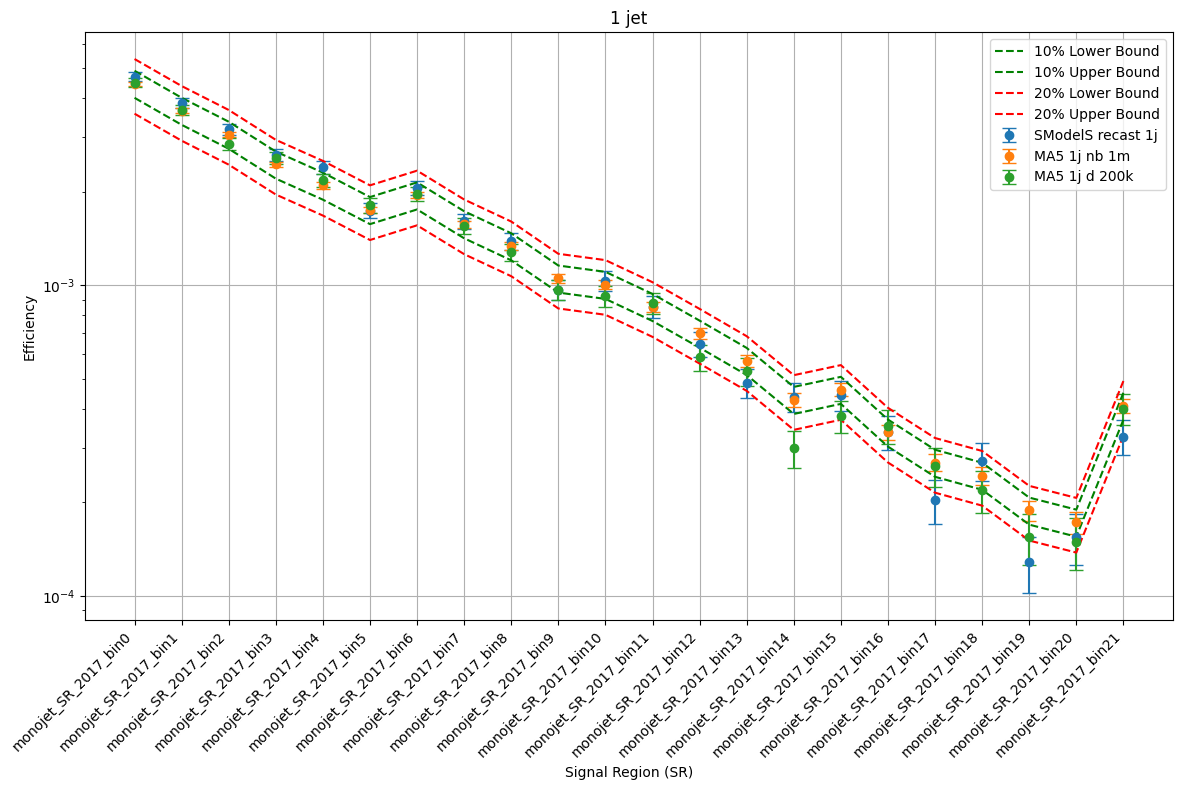

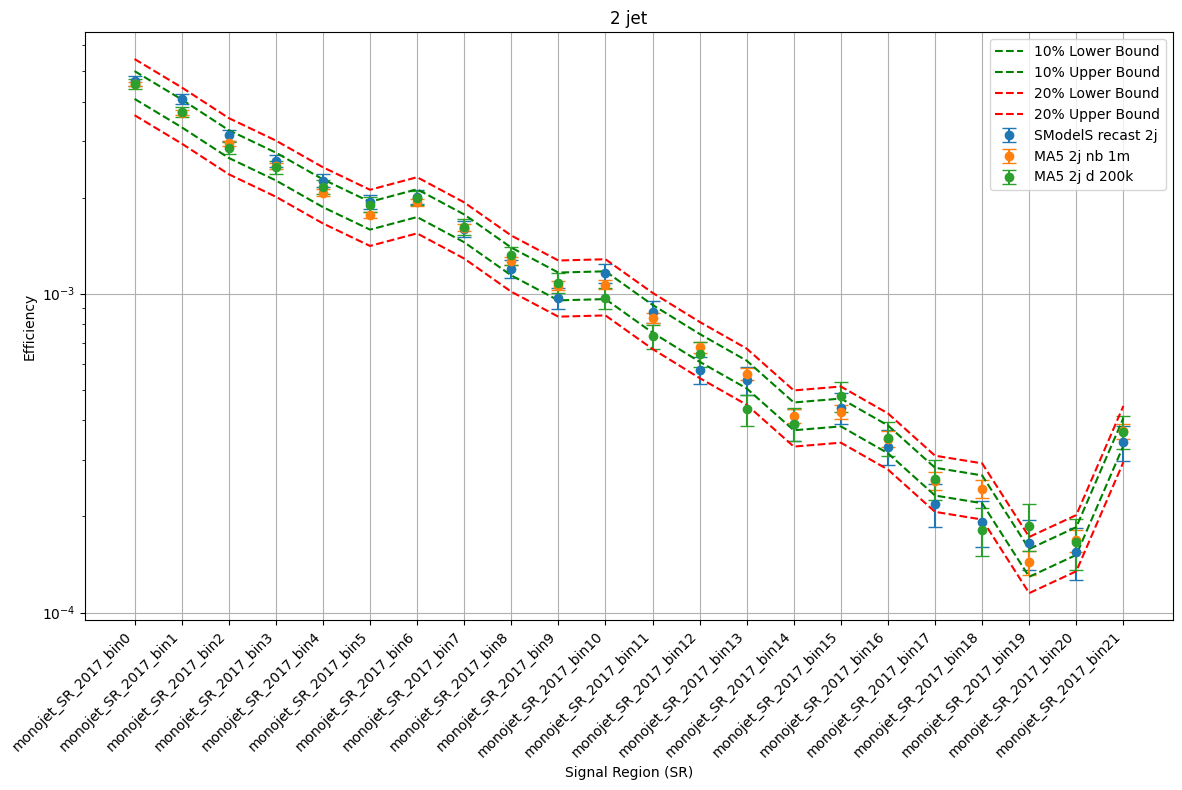

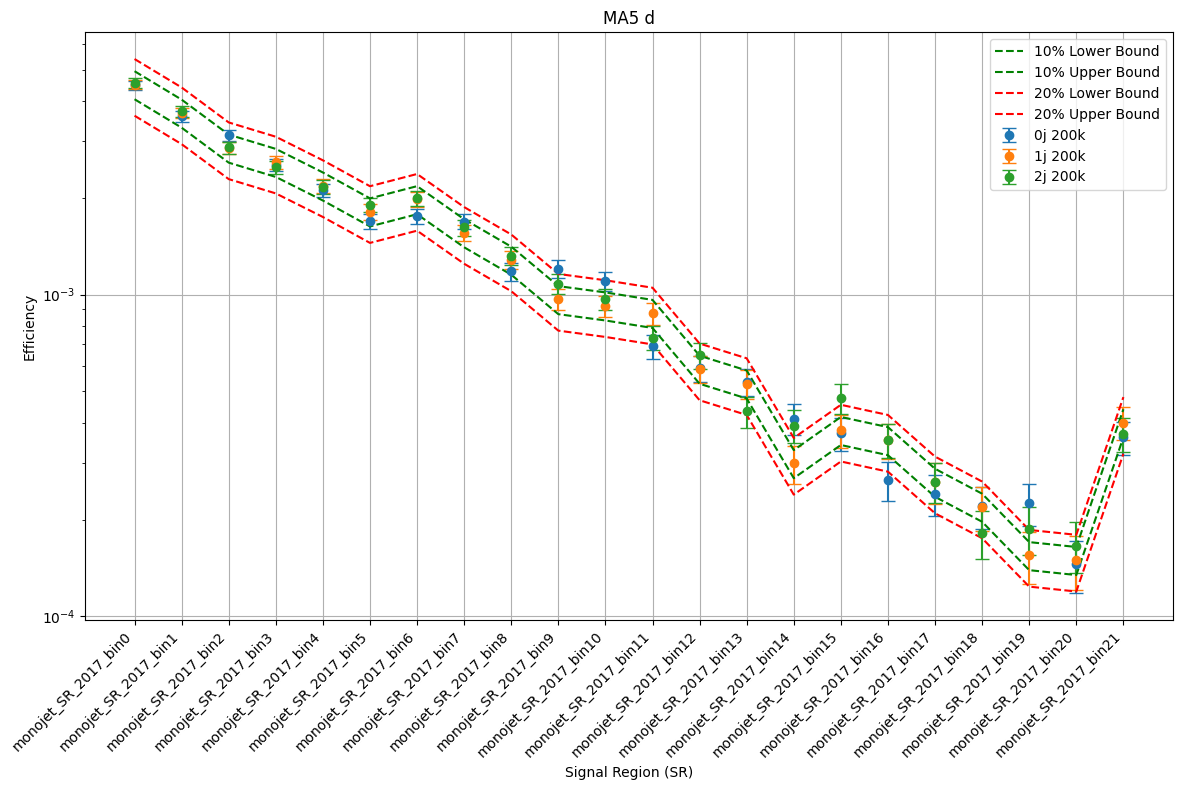

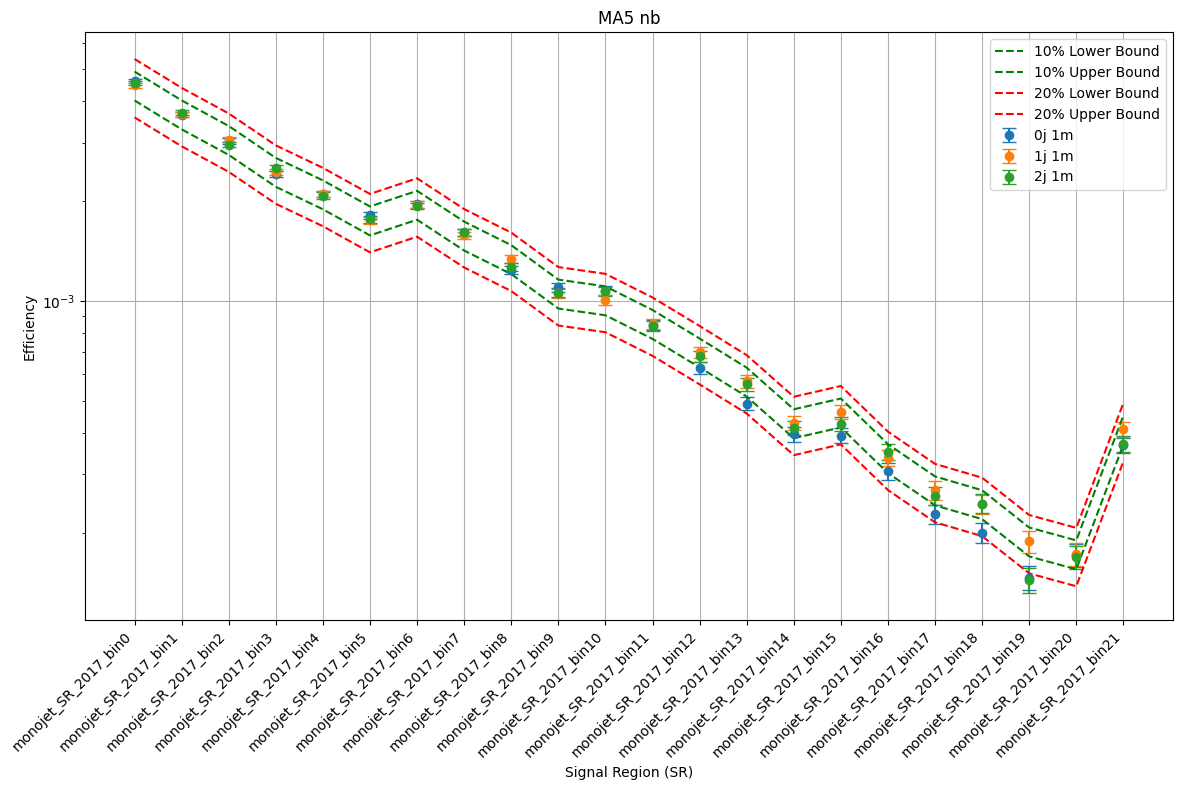

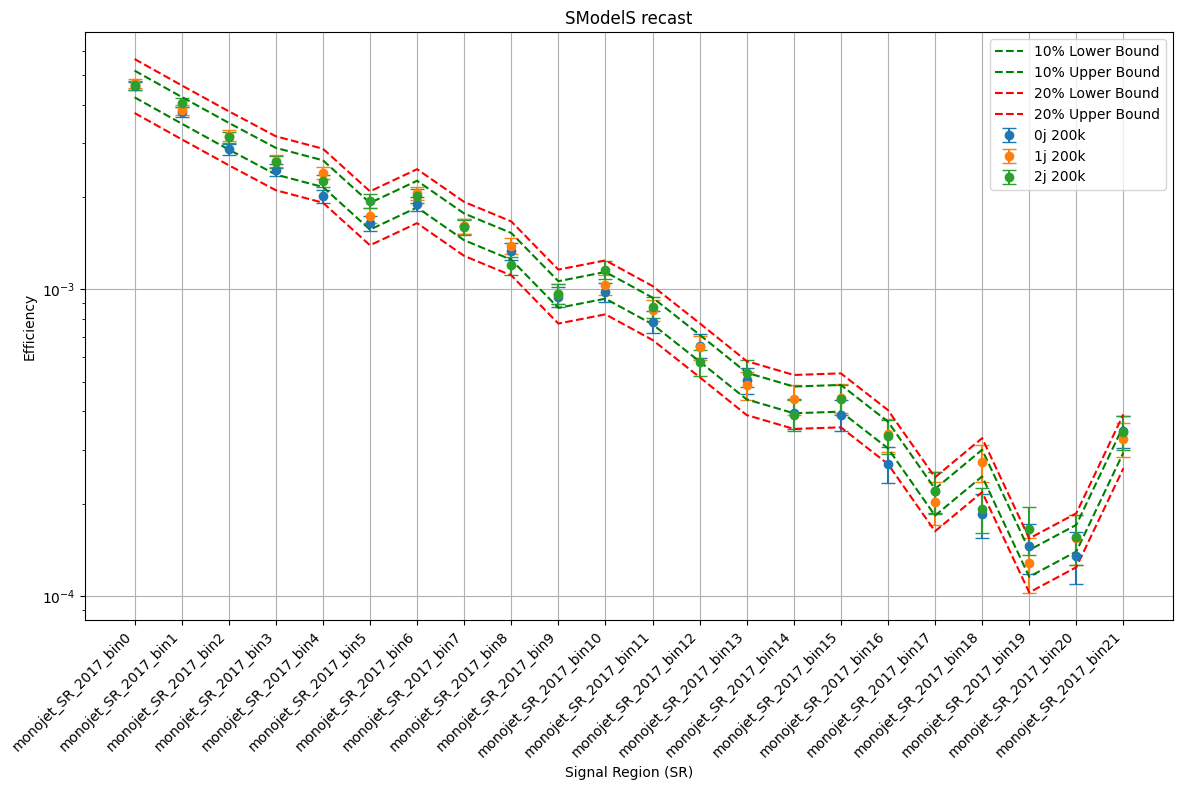

In [3]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Load the .pcl file
pcl_0j = "SModelS-recast-chain/200k/TChiISR_test_0j_2001_2000_200K/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_0j = pd.read_pickle(pcl_0j).T
pcl_1j = "SModelS-recast-chain/200k/TChiISR_test_1j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_1j = pd.read_pickle(pcl_1j).T
pcl_2j = "SModelS-recast-chain/200k/TChiISR_test_2j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_2j = pd.read_pickle(pcl_2j).T

filtered_lines_0j = df_0j[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error")]
SR_0j = filtered_lines_0j.index.tolist()
filtered_lines_1j = df_1j[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error")]
SR_1j = filtered_lines_1j.index.tolist()
filtered_lines_2j = df_2j[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error")]
SR_2j = filtered_lines_2j.index.tolist()

########################################################

# 0 jets

nevents_2016_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error"), 0].tolist())
nevents_2017_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error"), 1].tolist())
nevents_2018_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error"), 2].tolist())

lumi_2016_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("Luminosity"), 0].tolist())
lumi_2017_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("Luminosity"), 1].tolist())
lumi_2018_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("Luminosity"), 2].tolist())

tot_cx_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("xsec") & ~df_0j.index.str.contains("pT150"), 0].tolist())*1000

nevents_err_p_2016_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorP"), 0].tolist())
nevents_err_p_2017_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorP"), 1].tolist())
nevents_err_p_2018_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorP"), 2].tolist())

nevents_err_m_2016_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorM"), 0].tolist())
nevents_err_m_2017_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorM"), 1].tolist())
nevents_err_m_2018_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorM"), 2].tolist())


tot_lumi_0j = lumi_2016_fb_0j + lumi_2017_fb_0j + lumi_2018_fb_0j

eff_2016_0j = nevents_2016_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_2017_0j = nevents_2017_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_2018_0j = nevents_2018_0j / (tot_lumi_0j * tot_cx_fb_0j)

eff_err_p_2016_0j = nevents_err_p_2016_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_err_p_2017_0j = nevents_err_p_2017_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_err_p_2018_0j = nevents_err_p_2018_0j / (tot_lumi_0j * tot_cx_fb_0j)

########################################################

# 1 jets

nevents_2016_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error"), 0].tolist())
nevents_2017_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error"), 1].tolist())
nevents_2018_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error"), 2].tolist())

lumi_2016_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("Luminosity"), 0].tolist())
lumi_2017_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("Luminosity"), 1].tolist())
lumi_2018_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("Luminosity"), 2].tolist())

tot_cx_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("xsec") & ~df_1j.index.str.contains("pT150"), 0].tolist())*1000

nevents_err_p_2016_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorP"), 0].tolist())
nevents_err_p_2017_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorP"), 1].tolist())
nevents_err_p_2018_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorP"), 2].tolist())

nevents_err_m_2016_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorM"), 0].tolist())
nevents_err_m_2017_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorM"), 1].tolist())
nevents_err_m_2018_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorM"), 2].tolist())


tot_lumi_1j = lumi_2016_fb_1j + lumi_2017_fb_1j + lumi_2018_fb_1j

eff_2016_1j = nevents_2016_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_2017_1j = nevents_2017_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_2018_1j = nevents_2018_1j / (tot_lumi_1j * tot_cx_fb_1j)

eff_err_p_2016_1j = nevents_err_p_2016_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_err_p_2017_1j = nevents_err_p_2017_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_err_p_2018_1j = nevents_err_p_2018_1j / (tot_lumi_1j * tot_cx_fb_1j)

########################################################

# 2 jets

nevents_2016_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error"), 0].tolist())
nevents_2017_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error"), 1].tolist())
nevents_2018_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error"), 2].tolist())

lumi_2016_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("Luminosity"), 0].tolist())
lumi_2017_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("Luminosity"), 1].tolist())
lumi_2018_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("Luminosity"), 2].tolist())

tot_cx_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("xsec") & ~df_2j.index.str.contains("pT150"), 0].tolist())*1000

nevents_err_p_2016_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorP"), 0].tolist())
nevents_err_p_2017_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorP"), 1].tolist())
nevents_err_p_2018_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorP"), 2].tolist())

nevents_err_m_2016_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorM"), 0].tolist())
nevents_err_m_2017_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorM"), 1].tolist())
nevents_err_m_2018_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorM"), 2].tolist())


tot_lumi_2j = lumi_2016_fb_2j + lumi_2017_fb_2j + lumi_2018_fb_2j

eff_2016_2j = nevents_2016_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_2017_2j = nevents_2017_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_2018_2j = nevents_2018_2j / (tot_lumi_2j * tot_cx_fb_2j)

eff_err_p_2016_2j = nevents_err_p_2016_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_err_p_2017_2j = nevents_err_p_2017_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_err_p_2018_2j = nevents_err_p_2018_2j / (tot_lumi_2j * tot_cx_fb_2j)

########################################################

def extract_cut_info(filename):
    cut_dict = {}
    initial_entries = None
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract initial number of entries
    for i, line in enumerate(lines):
        if "<InitialCounter>" in line:
            initial_entries = int(lines[i+2].split()[0])  # nentries is on the third line after <InitialCounter>

    return initial_entries

MA5_0j_d_entries = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2017.saf'
MA5_1j_d_entries = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2017.saf'
MA5_2j_d_entries = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf'

MA5_0j_nb_entries = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2017.saf'
MA5_1j_nb_entries = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2017.saf'
MA5_2j_nb_entries = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2016.saf'

tot_entries_0j_d = extract_cut_info(MA5_0j_d_entries)
tot_entries_1j_d = extract_cut_info(MA5_1j_d_entries)
tot_entries_2j_d = extract_cut_info(MA5_2j_d_entries)

tot_entries_0j_nb = extract_cut_info(MA5_0j_nb_entries)
tot_entries_1j_nb = extract_cut_info(MA5_1j_nb_entries)
tot_entries_2j_nb = extract_cut_info(MA5_2j_nb_entries)


# Function to load and process the data file
def extract_efficiencies(file_path, start_index=0, end_index=None):
    """
    Extracts signal region names, efficiencies, and their statistical errors from the file.

    Parameters:
    - file_path: Path to the data file.
    - start_index: Starting index for signal regions (inclusive). Default is 0.
    - end_index: Ending index for signal regions (exclusive).
    If None, include all regions starting from start_index.

    Returns:
    - regions: NumPy array of signal region names.
    - efficiencies: NumPy array of efficiencies as floats.
    - errors: NumPy array of statistical errors as floats.
    """
    # Open the file and preprocess the lines
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Remove header and clean up lines
    data_lines = [line.strip() for line in lines if not line.startswith('#') and line.strip()]
    
    # Split and parse the lines
    parsed_data = []
    for line in data_lines:
        # Split the line into parts
        parts = line.split('||')
        if len(parts) != 2:
            continue  # Skip malformed lines
        left, right = parts
        columns = left.split() + right.split()
        parsed_data.append(columns)
    
    # Convert parsed data into a DataFrame
    df = pd.DataFrame(parsed_data, columns=['dataset', 'analysis', 'region', 'sig95_exp', 
                                            'sig95_obs', 'efficiency', 'error'])
    
    # Apply the slicing based on start_index and end_index
    if end_index is not None:
        df = df.iloc[start_index:end_index]
    else:
        df = df.iloc[start_index:]
    
    # Extract columns
    regions = df['region'].tolist()
    efficiencies = df['efficiency'].astype(float).tolist()
    errors = df['error'].astype(float).tolist()
    
    return np.array(regions), np.array(efficiencies), np.array(errors)

start_index = 22
end_index = 44

# from MA5 (default EM creator run card and non biased run card)

MA5_0j_d = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_1j_d = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_2j_d = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'

MA5_0j_nb = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_1j_nb = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_2j_nb = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'


regions_0j_d, eff_0j_d, err_0j_d = extract_efficiencies(MA5_0j_d,
                                                        start_index=start_index, end_index=end_index)
regions_1j_d, eff_1j_d, err_1j_d = extract_efficiencies(MA5_1j_d,
                                                        start_index=start_index, end_index=end_index)
regions_2j_d, eff_2j_d, err_2j_d = extract_efficiencies(MA5_2j_d,
                                                        start_index=start_index, end_index=end_index)

regions_0j_nb, eff_0j_nb, err_0j_nb = extract_efficiencies(MA5_0j_nb,
                                                        start_index=start_index, end_index=end_index)
regions_1j_nb, eff_1j_nb, err_1j_nb = extract_efficiencies(MA5_1j_nb,
                                                        start_index=start_index, end_index=end_index)
regions_2j_nb, eff_2j_nb, err_2j_nb = extract_efficiencies(MA5_2j_nb,
                                                        start_index=start_index, end_index=end_index)

delta_eff_0j_d = np.sqrt( (eff_0j_d * (1 - eff_0j_d)) / tot_entries_0j_d )
delta_eff_1j_d = np.sqrt( (eff_1j_d * (1 - eff_1j_d)) / tot_entries_1j_d )
delta_eff_2j_d = np.sqrt( (eff_2j_d * (1 - eff_2j_d)) / tot_entries_2j_d )

delta_eff_0j_nb = np.sqrt( (eff_0j_nb * (1 - eff_0j_nb)) / tot_entries_0j_nb )
delta_eff_1j_nb = np.sqrt( (eff_1j_nb * (1 - eff_1j_nb)) / tot_entries_1j_nb )
delta_eff_2j_nb = np.sqrt( (eff_2j_nb * (1 - eff_2j_nb)) / tot_entries_2j_nb )

###############################################################
# Compute percentage difference
percentage_diff_0j = np.abs(eff_0j_nb - eff_2017_0j) / ((eff_0j_nb + eff_2017_0j) / 2) * 100
percentage_diff_1j = np.abs(eff_1j_nb - eff_2017_1j) / ((eff_1j_nb + eff_2017_1j) / 2) * 100
percentage_diff_2j = np.abs(eff_2j_nb - eff_2017_2j) / ((eff_2j_nb + eff_2017_2j) / 2) * 100

ma5_percentage_diff_0j = np.abs(eff_0j_nb - eff_0j_d) / ((eff_0j_nb + eff_0j_d) / 2) * 100
ma5_percentage_diff_1j = np.abs(eff_1j_nb - eff_1j_d) / ((eff_1j_nb + eff_1j_d) / 2) * 100
ma5_percentage_diff_2j = np.abs(eff_2j_nb - eff_2j_d) / ((eff_2j_nb + eff_2j_d) / 2) * 100

print("0j MA5 percentage difference (EM creator default run card vs non-biased run card) : ",
      ma5_percentage_diff_0j)
print("------------------------------------------")
print("1j MA5 percentage difference (EM creator default run card vs non-biased run card) : ",
      ma5_percentage_diff_1j)
print("------------------------------------------")
print("2j MA5 percentage difference (EM creator default run card vs non-biased run card) : ",
      ma5_percentage_diff_2j)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")

print("0j percentage difference (MA5 vs SModelS recast) : ", percentage_diff_0j)
print("------------------------------------------")
print("1j percentage difference (MA5 vs SModelS recast) : ", percentage_diff_1j)
print("------------------------------------------")
print("2j percentage difference (MA5 vs SModelS recast) : ", percentage_diff_2j)

# Calculate 10% error values

ten_percent_error_1j_d = [0.1 * eff for eff in eff_1j_d]
twenty_percent_error_1j_d = [0.2 * eff for eff in eff_1j_d]


ten_percent_error_0j = [0.1 * eff for eff in eff_0j_nb]
twenty_percent_error_0j = [0.2 * eff for eff in eff_0j_nb]

ten_percent_error_1j = [0.1 * eff for eff in eff_1j_nb]
twenty_percent_error_1j = [0.2 * eff for eff in eff_1j_nb]

ten_percent_error_2j = [0.1 * eff for eff in eff_2j_nb]
twenty_percent_error_2j = [0.2 * eff for eff in eff_2j_nb]


ten_percent_error_1j_SM = [0.1 * eff for eff in eff_2017_1j]
twenty_percent_error_1j_SM = [0.2 * eff for eff in eff_2017_1j]

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_0j_d, eff_2017_0j, yerr=eff_err_p_2017_0j, fmt='o', capsize=5,
             label=f'SModelS recast 0j')

plt.errorbar(regions_0j_nb, eff_0j_nb, yerr=delta_eff_0j_nb, fmt='o', capsize=5,
             label=f'MA5 0j nb 1m')
plt.errorbar(regions_0j_d, eff_0j_d, yerr=delta_eff_0j_d, fmt='o', capsize=5,
             label=f'MA5 0j d 200k')

# Plot the 10% error as line intervals
plt.plot(regions_0j_nb, [eff - err for eff, err in zip(eff_0j_nb, ten_percent_error_0j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_0j_nb, [eff + err for eff, err in zip(eff_0j_nb, ten_percent_error_0j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_0j_nb, [eff - err for eff, err in zip(eff_0j_nb, twenty_percent_error_0j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_0j_nb, [eff + err for eff, err in zip(eff_0j_nb, twenty_percent_error_0j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('0 jets')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_1j_d, eff_2017_1j, yerr=eff_err_p_2017_1j, fmt='o', capsize=5,
             label=f'SModelS recast 1j')

plt.errorbar(regions_1j_nb, eff_1j_nb, yerr=delta_eff_1j_nb, fmt='o', capsize=5,
             label=f'MA5 1j nb 1m')
plt.errorbar(regions_1j_d, eff_1j_d, yerr=delta_eff_1j_d, fmt='o', capsize=5,
             label=f'MA5 1j d 200k')

# Plot the 10% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('1 jet')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_2j_d, eff_2017_2j, yerr=eff_err_p_2017_2j, fmt='o', capsize=5,
             label=f'SModelS recast 2j')

plt.errorbar(regions_2j_nb, eff_2j_nb, yerr=delta_eff_2j_nb, fmt='o', capsize=5,
             label=f'MA5 2j nb 1m')
plt.errorbar(regions_2j_d, eff_2j_d, yerr=delta_eff_2j_d, fmt='o', capsize=5,
             label=f'MA5 2j d 200k')

# Plot the 10% error as line intervals
plt.plot(regions_2j_nb, [eff - err for eff, err in zip(eff_2j_nb, ten_percent_error_2j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_2j_nb, [eff + err for eff, err in zip(eff_2j_nb, ten_percent_error_2j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_2j_nb, [eff - err for eff, err in zip(eff_2j_nb, twenty_percent_error_2j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_2j_nb, [eff + err for eff, err in zip(eff_2j_nb, twenty_percent_error_2j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('2 jet')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
#plt.ylim(0.001,0.005)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_0j_d, eff_0j_d, yerr=delta_eff_0j_d, fmt='o', capsize=5,
             label=f'0j 200k')
plt.errorbar(regions_1j_d, eff_1j_d, yerr=delta_eff_1j_d, fmt='o', capsize=5,
             label=f'1j 200k')
plt.errorbar(regions_2j_d, eff_2j_d, yerr=delta_eff_2j_d, fmt='o', capsize=5,
             label=f'2j 200k')

# Plot the 10% error as line intervals
plt.plot(regions_1j_d, [eff - err for eff, err in zip(eff_1j_d, ten_percent_error_1j_d)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_d, [eff + err for eff, err in zip(eff_1j_d, ten_percent_error_1j_d)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_d, [eff - err for eff, err in zip(eff_1j_d, twenty_percent_error_1j_d)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_d, [eff + err for eff, err in zip(eff_1j_d, twenty_percent_error_1j_d)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('MA5 d')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_0j_nb, eff_0j_nb, yerr=delta_eff_0j_nb, fmt='o', capsize=5,
             label=f'0j 1m')
plt.errorbar(regions_1j_nb, eff_1j_nb, yerr=delta_eff_1j_nb, fmt='o', capsize=5,
             label=f'1j 1m')
plt.errorbar(regions_2j_nb, eff_2j_nb, yerr=delta_eff_2j_nb, fmt='o', capsize=5,
             label=f'2j 1m')

# Plot the 10% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('MA5 nb')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_0j_nb, eff_2017_0j, yerr=eff_err_p_2017_0j, fmt='o', capsize=5,
             label=f'0j 200k')
plt.errorbar(regions_1j_nb, eff_2017_1j, yerr=eff_err_p_2017_1j, fmt='o', capsize=5,
             label=f'1j 200k')
plt.errorbar(regions_2j_nb, eff_2017_2j, yerr=eff_err_p_2017_2j, fmt='o', capsize=5,
             label=f'2j 200k')

# Plot the 10% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_2017_1j, ten_percent_error_1j_SM)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_2017_1j, ten_percent_error_1j_SM)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_2017_1j, twenty_percent_error_1j_SM)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_2017_1j, twenty_percent_error_1j_SM)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('SModelS recast')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

0j MA5 percentage difference (EM creator default run card vs non-biased run card) :  [ 1.52420801  1.20494324  5.73306962  0.93883984  7.72738376  4.75792578
  3.22337701  3.51749867  9.05232575 13.16222026  6.67269062  1.15587709
  3.58879759  9.72706156  3.3316675   2.01571891 19.49636262  2.1090153
  4.72916317  5.3807947  40.47301163 23.33403406]
------------------------------------------
1j MA5 percentage difference (EM creator default run card vs non-biased run card) :  [ 1.65803872  3.39331385  2.99811377  2.05957703  7.16602072  9.49198194
  0.38708542  3.29456922  1.76852474  0.61525699  5.47656661  1.10631996
  1.36706795  0.54358634  9.64157145  5.4617206  18.78589007  0.84858128
  1.0678392   3.94258373 17.00563587 23.79079827]
------------------------------------------
2j MA5 percentage difference (EM creator default run card vs non-biased run card) :  [ 7.49350054  3.74146434  5.05235824  5.40271463  3.95642202  6.592144
  5.2836284   7.59205768  3.70461572  2.71732131  1

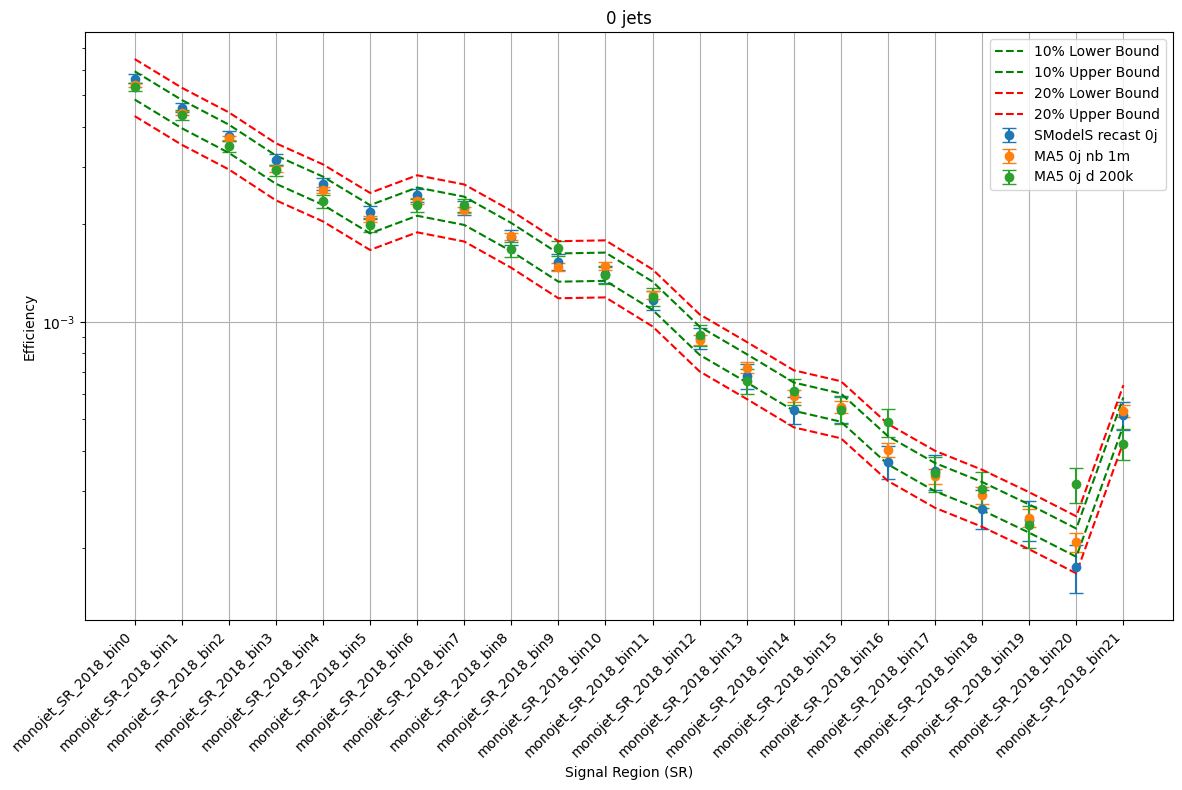

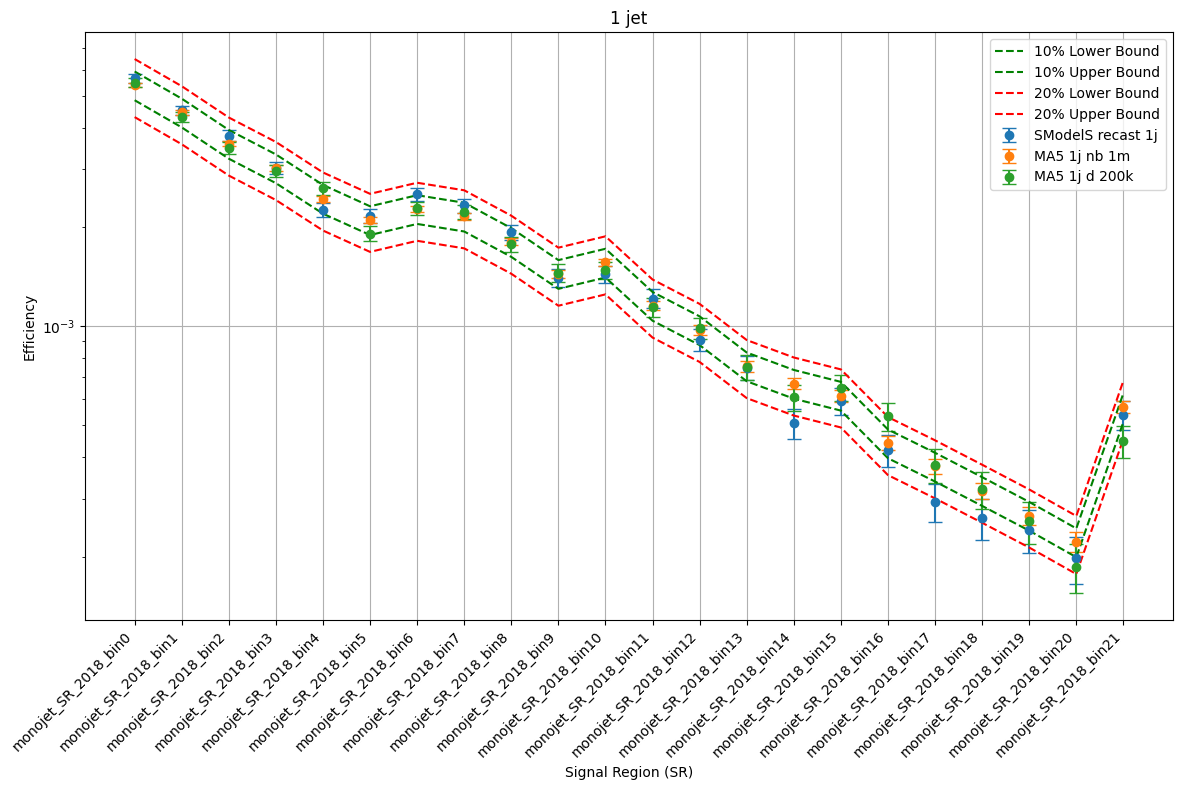

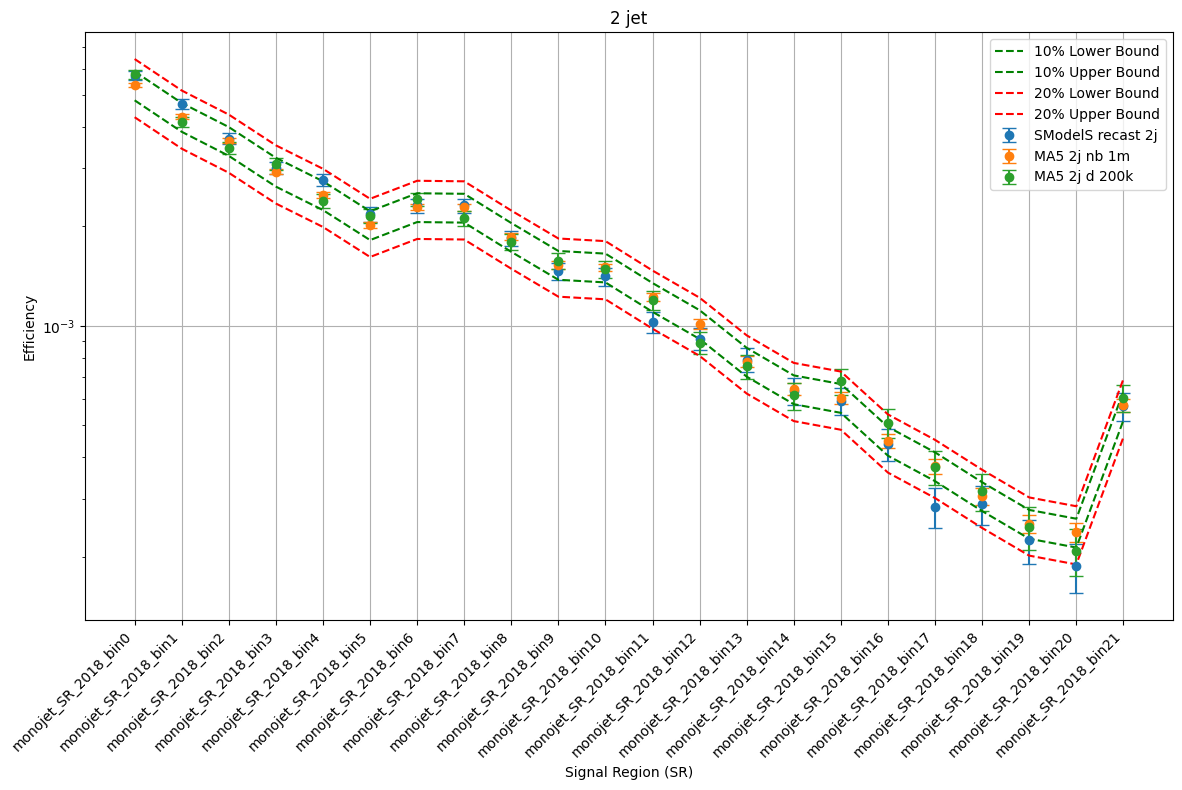

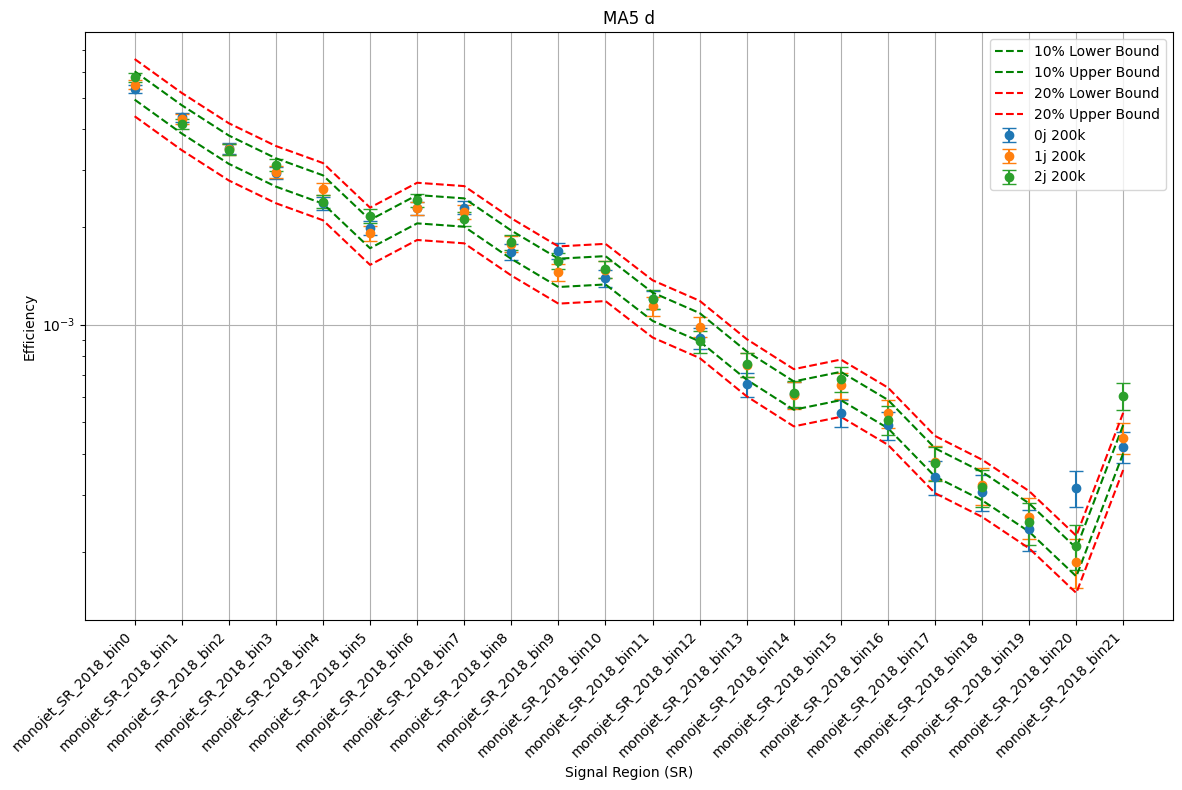

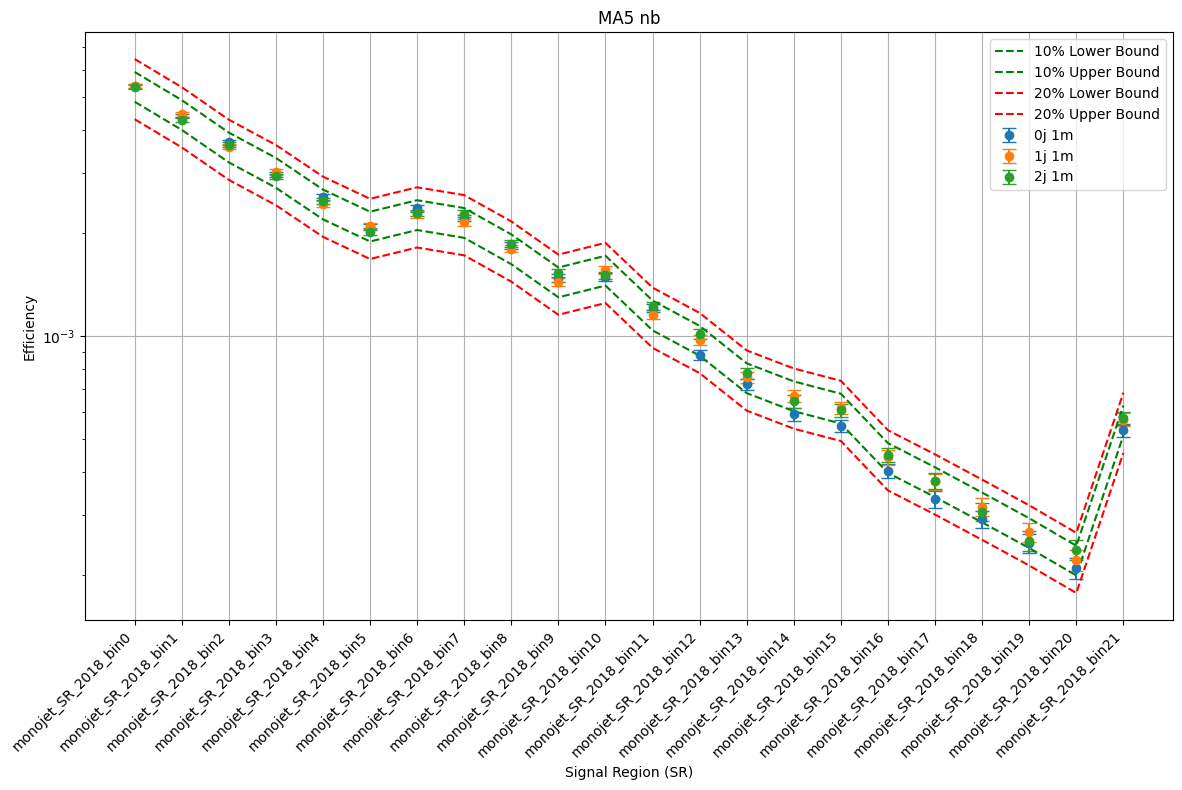

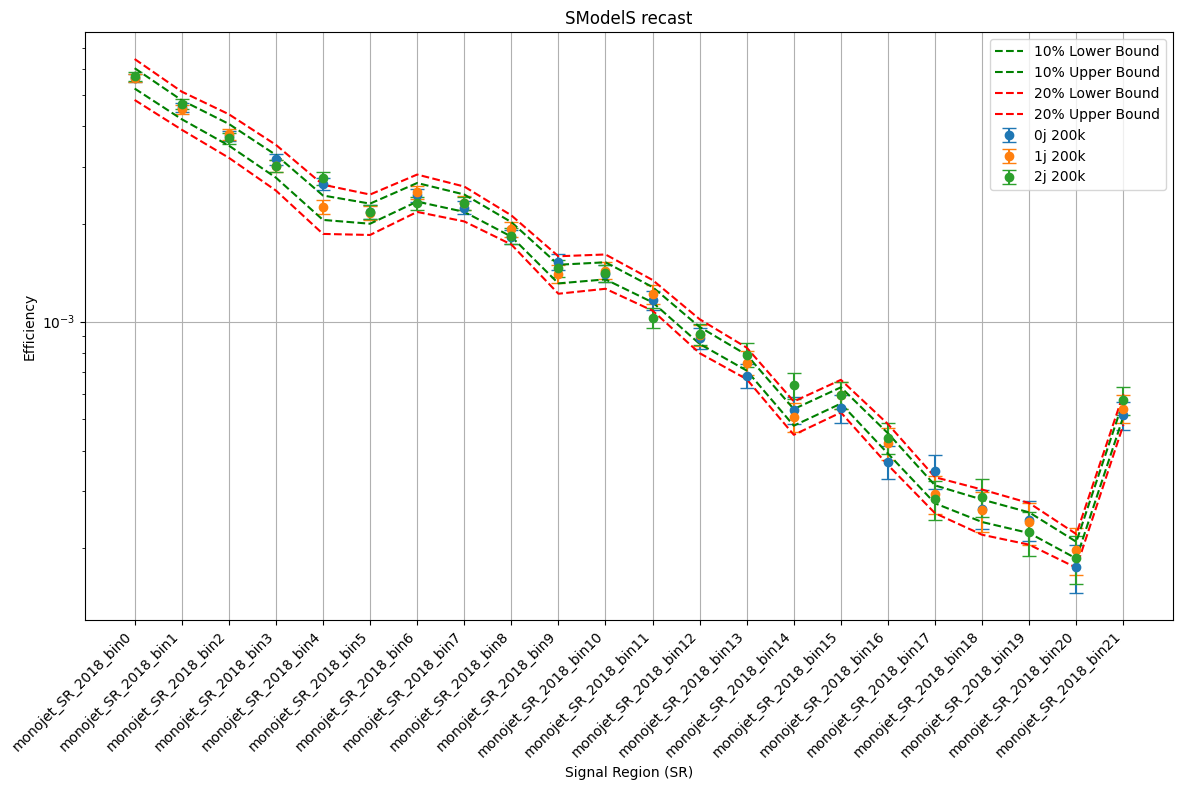

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

# Load the .pcl file
pcl_0j = "SModelS-recast-chain/200k/TChiISR_test_0j_2001_2000_200K/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_0j = pd.read_pickle(pcl_0j).T
pcl_1j = "SModelS-recast-chain/200k/TChiISR_test_1j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_1j = pd.read_pickle(pcl_1j).T
pcl_2j = "SModelS-recast-chain/200k/TChiISR_test_2j_2001_2000_200k/Events/run_01/\
TChiISR_2001_2000_cms_exo_20_004.pcl"
df_2j = pd.read_pickle(pcl_2j).T

filtered_lines_0j = df_0j[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error")]
SR_0j = filtered_lines_0j.index.tolist()
filtered_lines_1j = df_1j[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error")]
SR_1j = filtered_lines_1j.index.tolist()
filtered_lines_2j = df_2j[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error")]
SR_2j = filtered_lines_2j.index.tolist()

########################################################

# 0 jets

nevents_2016_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error"), 0].tolist())
nevents_2017_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error"), 1].tolist())
nevents_2018_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & ~df_0j.index.str.contains("Error"), 2].tolist())

lumi_2016_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("Luminosity"), 0].tolist())
lumi_2017_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("Luminosity"), 1].tolist())
lumi_2018_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("Luminosity"), 2].tolist())

tot_cx_fb_0j = np.array(df_0j.loc[df_0j.index.str.contains("xsec") & ~df_0j.index.str.contains("pT150"), 0].tolist())*1000

nevents_err_p_2016_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorP"), 0].tolist())
nevents_err_p_2017_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorP"), 1].tolist())
nevents_err_p_2018_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorP"), 2].tolist())

nevents_err_m_2016_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorM"), 0].tolist())
nevents_err_m_2017_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorM"), 1].tolist())
nevents_err_m_2018_0j = np.array(df_0j.loc[df_0j.index.str.contains("bin") & df_0j.index.str.contains("ErrorM"), 2].tolist())


tot_lumi_0j = lumi_2016_fb_0j + lumi_2017_fb_0j + lumi_2018_fb_0j

eff_2016_0j = nevents_2016_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_2017_0j = nevents_2017_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_2018_0j = nevents_2018_0j / (tot_lumi_0j * tot_cx_fb_0j)

eff_err_p_2016_0j = nevents_err_p_2016_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_err_p_2017_0j = nevents_err_p_2017_0j / (tot_lumi_0j * tot_cx_fb_0j)
eff_err_p_2018_0j = nevents_err_p_2018_0j / (tot_lumi_0j * tot_cx_fb_0j)

########################################################

# 1 jets

nevents_2016_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error"), 0].tolist())
nevents_2017_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error"), 1].tolist())
nevents_2018_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & ~df_1j.index.str.contains("Error"), 2].tolist())

lumi_2016_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("Luminosity"), 0].tolist())
lumi_2017_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("Luminosity"), 1].tolist())
lumi_2018_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("Luminosity"), 2].tolist())

tot_cx_fb_1j = np.array(df_1j.loc[df_1j.index.str.contains("xsec") & ~df_1j.index.str.contains("pT150"), 0].tolist())*1000

nevents_err_p_2016_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorP"), 0].tolist())
nevents_err_p_2017_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorP"), 1].tolist())
nevents_err_p_2018_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorP"), 2].tolist())

nevents_err_m_2016_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorM"), 0].tolist())
nevents_err_m_2017_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorM"), 1].tolist())
nevents_err_m_2018_1j = np.array(df_1j.loc[df_1j.index.str.contains("bin") & df_1j.index.str.contains("ErrorM"), 2].tolist())


tot_lumi_1j = lumi_2016_fb_1j + lumi_2017_fb_1j + lumi_2018_fb_1j

eff_2016_1j = nevents_2016_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_2017_1j = nevents_2017_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_2018_1j = nevents_2018_1j / (tot_lumi_1j * tot_cx_fb_1j)

eff_err_p_2016_1j = nevents_err_p_2016_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_err_p_2017_1j = nevents_err_p_2017_1j / (tot_lumi_1j * tot_cx_fb_1j)
eff_err_p_2018_1j = nevents_err_p_2018_1j / (tot_lumi_1j * tot_cx_fb_1j)

########################################################

# 2 jets

nevents_2016_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error"), 0].tolist())
nevents_2017_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error"), 1].tolist())
nevents_2018_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & ~df_2j.index.str.contains("Error"), 2].tolist())

lumi_2016_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("Luminosity"), 0].tolist())
lumi_2017_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("Luminosity"), 1].tolist())
lumi_2018_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("Luminosity"), 2].tolist())

tot_cx_fb_2j = np.array(df_2j.loc[df_2j.index.str.contains("xsec") & ~df_2j.index.str.contains("pT150"), 0].tolist())*1000

nevents_err_p_2016_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorP"), 0].tolist())
nevents_err_p_2017_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorP"), 1].tolist())
nevents_err_p_2018_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorP"), 2].tolist())

nevents_err_m_2016_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorM"), 0].tolist())
nevents_err_m_2017_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorM"), 1].tolist())
nevents_err_m_2018_2j = np.array(df_2j.loc[df_2j.index.str.contains("bin") & df_2j.index.str.contains("ErrorM"), 2].tolist())


tot_lumi_2j = lumi_2016_fb_2j + lumi_2017_fb_2j + lumi_2018_fb_2j

eff_2016_2j = nevents_2016_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_2017_2j = nevents_2017_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_2018_2j = nevents_2018_2j / (tot_lumi_2j * tot_cx_fb_2j)

eff_err_p_2016_2j = nevents_err_p_2016_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_err_p_2017_2j = nevents_err_p_2017_2j / (tot_lumi_2j * tot_cx_fb_2j)
eff_err_p_2018_2j = nevents_err_p_2018_2j / (tot_lumi_2j * tot_cx_fb_2j)

########################################################

def extract_cut_info(filename):
    cut_dict = {}
    initial_entries = None
    with open(filename, 'r') as file:
        lines = file.readlines()

    # Extract initial number of entries
    for i, line in enumerate(lines):
        if "<InitialCounter>" in line:
            initial_entries = int(lines[i+2].split()[0])  # nentries is on the third line after <InitialCounter>

    return initial_entries

MA5_0j_d_entries = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf'
MA5_1j_d_entries = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf'
MA5_2j_d_entries = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf'

MA5_0j_nb_entries = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf'
MA5_1j_nb_entries = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf'
MA5_2j_nb_entries = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/cms_exo_20_004/Cutflows/monojet_SR_2018.saf'

tot_entries_0j_d = extract_cut_info(MA5_0j_d_entries)
tot_entries_1j_d = extract_cut_info(MA5_1j_d_entries)
tot_entries_2j_d = extract_cut_info(MA5_2j_d_entries)

tot_entries_0j_nb = extract_cut_info(MA5_0j_nb_entries)
tot_entries_1j_nb = extract_cut_info(MA5_1j_nb_entries)
tot_entries_2j_nb = extract_cut_info(MA5_2j_nb_entries)

# Function to load and process the data file
def extract_efficiencies(file_path, start_index=0, end_index=None):
    """
    Extracts signal region names, efficiencies, and their statistical errors from the file.

    Parameters:
    - file_path: Path to the data file.
    - start_index: Starting index for signal regions (inclusive). Default is 0.
    - end_index: Ending index for signal regions (exclusive).
    If None, include all regions starting from start_index.

    Returns:
    - regions: NumPy array of signal region names.
    - efficiencies: NumPy array of efficiencies as floats.
    - errors: NumPy array of statistical errors as floats.
    """
    # Open the file and preprocess the lines
    with open(file_path, 'r') as f:
        lines = f.readlines()
    
    # Remove header and clean up lines
    data_lines = [line.strip() for line in lines if not line.startswith('#') and line.strip()]
    
    # Split and parse the lines
    parsed_data = []
    for line in data_lines:
        # Split the line into parts
        parts = line.split('||')
        if len(parts) != 2:
            continue  # Skip malformed lines
        left, right = parts
        columns = left.split() + right.split()
        parsed_data.append(columns)
    
    # Convert parsed data into a DataFrame
    df = pd.DataFrame(parsed_data, columns=['dataset', 'analysis', 'region', 'sig95_exp', 
                                            'sig95_obs', 'efficiency', 'error'])
    
    # Apply the slicing based on start_index and end_index
    if end_index is not None:
        df = df.iloc[start_index:end_index]
    else:
        df = df.iloc[start_index:]
    
    # Extract columns
    regions = df['region'].tolist()
    efficiencies = df['efficiency'].astype(float).tolist()
    errors = df['error'].astype(float).tolist()
    
    return np.array(regions), np.array(efficiencies), np.array(errors)

start_index = 44
end_index = 66

# from MA5 (default EM creator run card and non biased run card)

MA5_0j_d = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_1j_d = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_2j_d = 'mg5_ma5_results_lpsc/200k-default-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'

MA5_0j_nb = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_0jet.2001_2000/\
ANA_TChiZISR_0jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_1j_nb = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_1jet.2001_2000/\
ANA_TChiZISR_1jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'
MA5_2j_nb = 'mg5_ma5_results_lpsc/1m-non-bias-run-card/ma5_TChiZISR_2jet.2001_2000/\
ANA_TChiZISR_2jet.2001_2000/Output/SAF/defaultset/CLs_output.dat'


regions_0j_d, eff_0j_d, err_0j_d = extract_efficiencies(MA5_0j_d,
                                                        start_index=start_index, end_index=end_index)
regions_1j_d, eff_1j_d, err_1j_d = extract_efficiencies(MA5_1j_d,
                                                        start_index=start_index, end_index=end_index)
regions_2j_d, eff_2j_d, err_2j_d = extract_efficiencies(MA5_2j_d,
                                                        start_index=start_index, end_index=end_index)

regions_0j_nb, eff_0j_nb, err_0j_nb = extract_efficiencies(MA5_0j_nb,
                                                        start_index=start_index, end_index=end_index)
regions_1j_nb, eff_1j_nb, err_1j_nb = extract_efficiencies(MA5_1j_nb,
                                                        start_index=start_index, end_index=end_index)
regions_2j_nb, eff_2j_nb, err_2j_nb = extract_efficiencies(MA5_2j_nb,
                                                        start_index=start_index, end_index=end_index)

delta_eff_0j_d = np.sqrt( (eff_0j_d * (1 - eff_0j_d)) / tot_entries_0j_d )
delta_eff_1j_d = np.sqrt( (eff_1j_d * (1 - eff_1j_d)) / tot_entries_1j_d )
delta_eff_2j_d = np.sqrt( (eff_2j_d * (1 - eff_2j_d)) / tot_entries_2j_d )

delta_eff_0j_nb = np.sqrt( (eff_0j_nb * (1 - eff_0j_nb)) / tot_entries_0j_nb )
delta_eff_1j_nb = np.sqrt( (eff_1j_nb * (1 - eff_1j_nb)) / tot_entries_1j_nb )
delta_eff_2j_nb = np.sqrt( (eff_2j_nb * (1 - eff_2j_nb)) / tot_entries_2j_nb )

###############################################################
# Compute percentage difference
percentage_diff_0j = np.abs(eff_0j_nb - eff_2016_0j) / ((eff_0j_nb + eff_2016_0j) / 2) * 100
percentage_diff_1j = np.abs(eff_1j_nb - eff_2016_1j) / ((eff_1j_nb + eff_2016_1j) / 2) * 100
percentage_diff_2j = np.abs(eff_2j_nb - eff_2016_2j) / ((eff_2j_nb + eff_2016_2j) / 2) * 100

ma5_percentage_diff_0j = np.abs(eff_0j_nb - eff_0j_d) / ((eff_0j_nb + eff_0j_d) / 2) * 100
ma5_percentage_diff_1j = np.abs(eff_1j_nb - eff_1j_d) / ((eff_1j_nb + eff_1j_d) / 2) * 100
ma5_percentage_diff_2j = np.abs(eff_2j_nb - eff_2j_d) / ((eff_2j_nb + eff_2j_d) / 2) * 100

print("0j MA5 percentage difference (EM creator default run card vs non-biased run card) : ",
      ma5_percentage_diff_0j)
print("------------------------------------------")
print("1j MA5 percentage difference (EM creator default run card vs non-biased run card) : ",
      ma5_percentage_diff_1j)
print("------------------------------------------")
print("2j MA5 percentage difference (EM creator default run card vs non-biased run card) : ",
      ma5_percentage_diff_2j)
print("------------------------------------------")
print("------------------------------------------")
print("")
print("")

print("0j percentage difference (MA5 vs SModelS recast) : ", percentage_diff_0j)
print("------------------------------------------")
print("1j percentage difference (MA5 vs SModelS recast) : ", percentage_diff_1j)
print("------------------------------------------")
print("2j percentage difference (MA5 vs SModelS recast) : ", percentage_diff_2j)

# Calculate 10% error values

ten_percent_error_1j_d = [0.1 * eff for eff in eff_1j_d]
twenty_percent_error_1j_d = [0.2 * eff for eff in eff_1j_d]


ten_percent_error_0j = [0.1 * eff for eff in eff_0j_nb]
twenty_percent_error_0j = [0.2 * eff for eff in eff_0j_nb]

ten_percent_error_1j = [0.1 * eff for eff in eff_1j_nb]
twenty_percent_error_1j = [0.2 * eff for eff in eff_1j_nb]

ten_percent_error_2j = [0.1 * eff for eff in eff_2j_nb]
twenty_percent_error_2j = [0.2 * eff for eff in eff_2j_nb]


ten_percent_error_1j_SM = [0.1 * eff for eff in eff_2016_1j]
twenty_percent_error_1j_SM = [0.2 * eff for eff in eff_2016_1j]

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
###plt.errorbar(regions_0j_nb, eff_0j_nb, yerr=err_0j_nb, fmt='o', capsize=5,
###             label=f'MA5 0j nb')
###plt.errorbar(regions_0j_d, eff_0j_d, yerr=err_0j_d, fmt='o', capsize=5,
###             label=f'MA5 0j d')
plt.errorbar(regions_0j_d, eff_2018_0j, yerr=eff_err_p_2018_0j, fmt='o', capsize=5,
             label=f'SModelS recast 0j')

plt.errorbar(regions_0j_nb, eff_0j_nb, yerr=delta_eff_0j_nb, fmt='o', capsize=5,
             label=f'MA5 0j nb 1m')
plt.errorbar(regions_0j_d, eff_0j_d, yerr=delta_eff_0j_d, fmt='o', capsize=5,
             label=f'MA5 0j d 200k')


# Plot the 10% error as line intervals
plt.plot(regions_0j_nb, [eff - err for eff, err in zip(eff_0j_nb, ten_percent_error_0j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_0j_nb, [eff + err for eff, err in zip(eff_0j_nb, ten_percent_error_0j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_0j_nb, [eff - err for eff, err in zip(eff_0j_nb, twenty_percent_error_0j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_0j_nb, [eff + err for eff, err in zip(eff_0j_nb, twenty_percent_error_0j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('0 jets')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
#plt.ylim(0.0001, 0.001)
#plt.ylim(0.001, 0.006)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
###plt.errorbar(regions_1j_nb, eff_1j_nb, yerr=err_1j_nb, fmt='o', capsize=5,
###             label=f'MA5 1j nb')
###plt.errorbar(regions_1j_d, eff_1j_d, yerr=err_1j_d, fmt='o', capsize=5,
###             label=f'MA5 1j d')
plt.errorbar(regions_1j_d, eff_2018_1j, yerr=eff_err_p_2018_1j, fmt='o', capsize=5,
             label=f'SModelS recast 1j')

plt.errorbar(regions_1j_nb, eff_1j_nb, yerr=delta_eff_1j_nb, fmt='o', capsize=5,
             label=f'MA5 1j nb 1m')
plt.errorbar(regions_1j_d, eff_1j_d, yerr=delta_eff_1j_d, fmt='o', capsize=5,
             label=f'MA5 1j d 200k')
#plt.errorbar(regions_1j_d, eff_2018_1j, fmt='o', capsize=5,
#             label=f'SModelS recast 1j 200k')

# Plot the 10% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('1 jet')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
#plt.ylim(0.0001, 0.001)
#plt.ylim(0.001, 0.006)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
###plt.errorbar(regions_2j_nb, eff_2j_nb, yerr=err_2j_nb, fmt='o', capsize=5,
###             label=f'MA5 2j nb')
###plt.errorbar(regions_2j_d, eff_2j_d, yerr=err_2j_d, fmt='o', capsize=5,
###             label=f'MA5 2j d')
plt.errorbar(regions_2j_d, eff_2018_2j, yerr=eff_err_p_2018_2j, fmt='o', capsize=5,
             label=f'SModelS recast 2j')

plt.errorbar(regions_2j_nb, eff_2j_nb, yerr=delta_eff_2j_nb, fmt='o', capsize=5,
             label=f'MA5 2j nb 1m')
plt.errorbar(regions_2j_d, eff_2j_d, yerr=delta_eff_2j_d, fmt='o', capsize=5,
             label=f'MA5 2j d 200k')


# Plot the 10% error as line intervals
plt.plot(regions_2j_nb, [eff - err for eff, err in zip(eff_2j_nb, ten_percent_error_2j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_2j_nb, [eff + err for eff, err in zip(eff_2j_nb, ten_percent_error_2j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_2j_nb, [eff - err for eff, err in zip(eff_2j_nb, twenty_percent_error_2j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_2j_nb, [eff + err for eff, err in zip(eff_2j_nb, twenty_percent_error_2j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('2 jet')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
#plt.ylim(0.0001, 0.001)
#plt.ylim(0.001, 0.006)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_0j_d, eff_0j_d, yerr=delta_eff_0j_d, fmt='o', capsize=5,
             label=f'0j 200k')
plt.errorbar(regions_1j_d, eff_1j_d, yerr=delta_eff_1j_d, fmt='o', capsize=5,
             label=f'1j 200k')
plt.errorbar(regions_2j_d, eff_2j_d, yerr=delta_eff_2j_d, fmt='o', capsize=5,
             label=f'2j 200k')



# Plot the 10% error as line intervals
plt.plot(regions_1j_d, [eff - err for eff, err in zip(eff_1j_d, ten_percent_error_1j_d)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_d, [eff + err for eff, err in zip(eff_1j_d, ten_percent_error_1j_d)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_d, [eff - err for eff, err in zip(eff_1j_d, twenty_percent_error_1j_d)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_d, [eff + err for eff, err in zip(eff_1j_d, twenty_percent_error_1j_d)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('MA5 d')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
#plt.ylim(0.0001, 0.001)
#plt.ylim(0.001, 0.006)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_0j_nb, eff_0j_nb, yerr=delta_eff_0j_nb, fmt='o', capsize=5,
             label=f'0j 1m')
plt.errorbar(regions_1j_nb, eff_1j_nb, yerr=delta_eff_1j_nb, fmt='o', capsize=5,
             label=f'1j 1m')
plt.errorbar(regions_2j_nb, eff_2j_nb, yerr=delta_eff_2j_nb, fmt='o', capsize=5,
             label=f'2j 1m')



# Plot the 10% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, ten_percent_error_1j)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_1j_nb, twenty_percent_error_1j)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('MA5 nb')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
#plt.ylim(0.0001, 0.001)
#plt.ylim(0.001, 0.006)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

###############################################################

plt.figure(figsize=(12, 8))

# Plot the efficiency with statistical error bars
plt.errorbar(regions_0j_nb, eff_2018_0j, yerr=eff_err_p_2018_0j, fmt='o', capsize=5,
             label=f'0j 200k')
plt.errorbar(regions_1j_nb, eff_2018_1j, yerr=eff_err_p_2018_1j, fmt='o', capsize=5,
             label=f'1j 200k')
plt.errorbar(regions_2j_nb, eff_2018_2j, yerr=eff_err_p_2018_2j, fmt='o', capsize=5,
             label=f'2j 200k')



# Plot the 10% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_2018_1j, ten_percent_error_1j_SM)],
         linestyle='--', label=f'10% Lower Bound', color = 'g')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_2018_1j, ten_percent_error_1j_SM)],
             linestyle='--', label=f'10% Upper Bound', color = 'g')

# Plot the 20% error as line intervals
plt.plot(regions_1j_nb, [eff - err for eff, err in zip(eff_2018_1j, twenty_percent_error_1j_SM)],
         linestyle='--', label=f'20% Lower Bound', color = 'r')
plt.plot(regions_1j_nb, [eff + err for eff, err in zip(eff_2018_1j, twenty_percent_error_1j_SM)],
             linestyle='--', label=f'20% Upper Bound', color = 'r')

# Customize the plot
plt.xticks(rotation=45, ha='right')
plt.title('SModelS recast')
plt.xlabel('Signal Region (SR)')
plt.ylabel('Efficiency')
plt.yscale("log")
#plt.ylim(0.0001, 0.001)
#plt.ylim(0.001, 0.006)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()